## Название проекта

Прогнозирование оттока клиентов телеком-оператора «ТелеДом»

Оператор связи «ТелеДом» предоставляет клиентам услуги стационарной телефонии и интернет-подключения (DSL и оптоволоконное). Дополнительно доступны сервисы интернет-безопасности, облачное хранение, антивирусная защита, техническая поддержка, а также стриминговые сервисы. Клиенты оплачивают услуги ежемесячно или по долгосрочным контрактам и могут выбирать разные способы оплаты.
Компания столкнулась с проблемой оттока клиентов: часть абонентов расторгает договор, и бизнес несёт убытки. Для удержания клиентов сотрудники планируют предлагать специальные условия и промокоды тем, кто потенциально собирается отказаться от услуг.

Цель проекта

Цель — разработать модель машинного обучения, которая будет предсказывать вероятность расторжения договора конкретным клиентом.
Ожидаемый результат:

- AUC-ROC модели на тестовой выборке не ниже 0.85;

- дополнительно рассчитать Accuracy и интерпретировать результаты;

- предоставить бизнесу рекомендации по использованию прогноза для таргетированных удерживающих мер.

## Описание данных

Для построения модели прогнозирования оттока клиентов доступны четыре таблицы, объединённые по ключу customerID. Данные отражают актуальное состояние договоров на 1 февраля 2020 года.

1. contract_new.csv — информация о договоре

customerID — идентификатор клиента.

BeginDate — дата начала действия договора.

EndDate — дата окончания действия договора (если пусто — договор активен).

Type — тип договора (ежемесячный, на год, на два года).

PaperlessBilling — получение электронного счёта (Yes/No).

PaymentMethod — способ оплаты (например, банковская карта, электронный перевод).

MonthlyCharges — ежемесячные расходы клиента по договору.

TotalCharges — общие расходы за всё время действия договора.

Комментарий: целевой признак churn будет сформирован на основе поля EndDate. Если договор завершён до или на дату среза — считаем, что клиент ушёл (churn = 1).

2. personal_new.csv — персональные данные клиента

customerID — идентификатор клиента.

gender — пол (Male/Female).

SeniorCitizen — пенсионный статус (0 — нет, 1 — да).

Partner — наличие супруга/супруги (Yes/No).

Dependents — наличие иждивенцев (Yes/No).

Комментарий: эти признаки помогают оценить социально-демографические факторы оттока.

3. internet_new.csv — информация об интернет-услугах

customerID — идентификатор клиента.

InternetService — тип подключения (DSL, Fiber optic, отсутствие подключения).

OnlineSecurity — блокировка опасных сайтов (Yes/No/No internet service).

OnlineBackup — облачное резервное копирование (Yes/No/No internet service).

DeviceProtection — антивирус (Yes/No/No internet service).

TechSupport — выделенная линия техподдержки (Yes/No/No internet service).

StreamingTV — услуга стримингового телевидения (Yes/No/No internet service).

StreamingMovies — каталог фильмов (Yes/No/No internet service).

Комментарий: наличие дополнительных услуг может влиять на лояльность клиента.

4. phone_new.csv — информация об услугах телефонии

customerID — идентификатор клиента.

MultipleLines — наличие возможности подключить несколько телефонных линий (Yes/No/No phone service).

Комментарий: дополнительная услуга телефонии также может быть фактором удержания клиента.

Вывод:

Каждый датасет вносит свой блок признаков:

contract_new.csv — финансовые и договорные условия (основа для целевого признака).

personal_new.csv — социально-демографические характеристики.

internet_new.csv — набор интернет-услуг.

phone_new.csv — сведения о телефонии.

Все таблицы будут объединены в единую итоговую выборку по customerID.

## План работы

### Шаг 1. Загрузка данных

Подгрузим все четыре файла (contract_new.csv, personal_new.csv, internet_new.csv, phone_new.csv).

Проверим корректность чтения, типы данных, размеры таблиц.

Выполним первичный осмотр (head, info, describe).

### Шаг 2. Исследовательский анализ и предобработка отдельных таблиц

Проверим наличие пропусков, некорректных значений, дубликатов.

Приведем признаки к корректным типам (даты - к datetime, числа - float/int, бинарные - 0/1).

Для категориальных признаков (Yes/No/No service) определим единую структуру значений.

Сформируем предварительные выводы: какие признаки нужны для модели.

###  Шаг 3. Объединим данные

Объединим таблицы по ключу customerID.

Сформируем целевой признак churn:

1 — если EndDate заполнен и ≤ даты среза (2020-02-01);

0 — если договор активен (EndDate пустой или > даты среза).

Проверим корректность объединения и распределение целевого признака.

### Шаг 4. EDA объединённого датафрейма

Изучим распределения признаков, построить визуализации (числовые и категориальные).

Выявим корреляции между признаками и с целевым признаком.

Сформируем новые признаки (например, tenure_months = стаж клиента в месяцах).

Проверим мультиколлинеарность признаков.

### Шаг 5. Подготовка данных

Разделим данные на train и test (соотношение 3:1, фиксируем RANDOM_STATE = 80925).

Учтем дисбаланс классов, при необходимости применим веса или балансировку.

Настроим пайплайн с ColumnTransformer:

числовые признаки - масштабирование;

категориальные признаки - кодирование (OneHot/OrdinalEncoder).

### Шаг 6. Обучение моделей

Обучим минимум две разные модели (например, Logistic Regression и Random Forest).

Для хотя бы одной модели проведем подбор ≥ 2 гиперпараметров с помощью кросс-валидации.

Используем метрику AUC-ROC как основную.

### Шаг 7. Выбор лучшей модели

Сравним модели по ROC-AUC и дополнительным метрикам (Accuracy, PR-AUC, F1).

Построим и проанализируем матрицу ошибок.

Определим значимость признаков (feature importance / коэффициенты).

### Шаг 8. Итоговый вывод и рекомендации

Подведем итоги по каждому шагу работы.

Оценим, насколько модель удовлетворяет условию (ROC-AUC ≥ 0.85).

Сформулируем рекомендации для бизнеса:

как использовать прогноз модели;

какие факторы наиболее сильно влияют на отток;

как операторам связи применять результаты (например, промокоды и спецусловия для клиентов из группы риска).

## Инсталы

In [1]:
!pip install phik
!pip install -U scikit-learn

## Импорты

In [2]:
import sys, subprocess
import pandas as pd
import numpy as np
from pathlib import Path
import re

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, randint, uniform, loguniform
from scipy import stats

import phik
from phik.report import plot_correlation_matrix
from phik import resources


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import (
    roc_auc_score, average_precision_score, accuracy_score, f1_score, roc_curve,
    precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,
    precision_recall_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance


from joblib import Memory
from sklearn.base import clone
import warnings
warnings.filterwarnings("ignore")


## Загрузка данных и первичный осмотр

In [3]:
# Константы путей
DATA_DIR = Path("/datasets")

# Имена файлов
CONTRACT_FILE = "contract_new.csv"
PERSONAL_FILE = "personal_new.csv"
INTERNET_FILE = "internet_new.csv"
PHONE_FILE    = "phone_new.csv"

### Загрузка и анализ contract_new.csv

In [4]:
# Загрузка
contract = pd.read_csv(DATA_DIR / CONTRACT_FILE)

# Проверка размеров
print("Размер таблицы contract:", contract.shape)

# Первичный осмотр
print("\n.head():")
display(contract.head())

print("\n.info():")
print(contract.info())

print("\n.describe(include='all'):")
display(contract.describe(include='all'))

# Проверим количество пропусков
print("\nПропуски по столбцам:")
print(contract.isna().sum())

Размер таблицы contract: (7043, 8)

.head():


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

.describe(include='all'):


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,67,3,2,4,NaN,6658
top,1260-TTRXI,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5942,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN



Пропуски по столбцам:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


###  Выводы по contract_new.csv

Размерность:

7043 строки × 8 столбцов. Это число клиентов, для которых есть договоры.

Столбцы:

customerID — уникальный идентификатор клиента (7043 уникальных значений).

BeginDate — дата начала действия договора (тип object, нужно привести к datetime).

EndDate — дата окончания действия договора (тип object, нужно привести к datetime). В таблице встречается значение "No", которое фактически означает «договор активен», то есть отсутствует дата. Это важно учесть.

Type — тип договора (Month-to-month, One year, Two year).

PaperlessBilling — электронный счёт (Yes / No).

PaymentMethod — способ оплаты (4 варианта: Electronic check, Mailed check, Bank transfer, Credit card).

MonthlyCharges — ежемесячные расходы клиента (тип float64).

TotalCharges — общие расходы клиента (сейчас тип object, нужно привести к числовому виду). Есть клиенты, где значение некорректное (например, пустое при очень коротком сроке пользования).

Пропусков нет в явном виде, но фактически:

в EndDate строка "No" — это признак отсутствия даты, нужно будет заменить на NaT.

в TotalCharges есть некорректные строки, поэтому поле не распозналось как числовое.

Распределение признаков:

Большинство клиентов — на помесячных контрактах (Month-to-month — 3875).

Чаще всего используется электронный счёт (Yes — 4171).

Популярный способ оплаты — Electronic check (2365 клиентов).

MonthlyCharges в среднем ~65, разброс от ~18 до ~119.

TotalCharges требует приведения к числовому типу для анализа.

### Загрузка и анализ personal_new.csv

In [5]:
# Загрузка
personal = pd.read_csv(DATA_DIR / PERSONAL_FILE)

# Проверка размеров
print("Размер таблицы personal:", personal.shape)

# Первичный осмотр
print("\n.head():")
display(personal.head())

print("\n.info():")
print(personal.info())

print("\n.describe(include='all'):")
display(personal.describe(include='all'))

# Проверка ключевого столбца
assert "customerID" in personal.columns, 'В таблице "personal" отсутствует столбец customerID'

# Пропуски по столбцам
print("\nПропуски по столбцам:")
print(personal.isna().sum())


Размер таблицы personal: (7043, 5)

.head():


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

.describe(include='all'):


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,1260-TTRXI,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



Пропуски по столбцам:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


### Выводы по personal_new.csv

Размерность:

7043 строки × 5 столбцов. Совпадает с количеством клиентов в contract_new.csv - таблицы полностью согласованы по customerID.

Столбцы:

customerID — уникальный идентификатор (все 7043 значения уникальны).

gender — пол клиента: Male (3555) и Female (3488). Баланс примерно 50/50.

SeniorCitizen — бинарный признак (0/1): 16% клиентов — пенсионеры.

Partner — наличие супруга/супруги: Yes/No (Yes ~ 3400, No ~ 3641).

Dependents — наличие иждивенцев: Yes/No (Yes ~ 2110, No ~ 4933).

Типы данных:

SeniorCitizen — int64, остальные (gender, Partner, Dependents) — категориальные, сейчас имеют тип object. Их позже переведём в категориальный тип.

Пропусков нет.

Распределения:

около 16% клиентов — пенсионеры.

Чаще встречаются клиенты без партнёра и без иждивенцев.

Вывод: таблица корректная, без пропусков, данные чистые. Все признаки потенциально полезны для анализа оттока (социально-демографический контекст).

### Загрузка и анализ internet_new.csv

In [6]:
# Загрузка
internet = pd.read_csv(DATA_DIR / INTERNET_FILE)

# Проверка размеров
print("Размер таблицы internet:", internet.shape)

# Первичный осмотр
print("\n.head():")
display(internet.head())

print("\n.info():")
print(internet.info())

print("\n.describe(include='all'):")
display(internet.describe(include='all'))

# Проверка ключевого столбца
assert "customerID" in internet.columns, 'В таблице "internet" отсутствует столбец customerID'

# Пропуски по столбцам
print("\nПропуски по столбцам:")
print(internet.isna().sum())


Размер таблицы internet: (5517, 8)

.head():


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

.describe(include='all'):


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,1260-TTRXI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Пропуски по столбцам:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


###  Выводы по internet_new.csv

Размерность:
5517 строк × 8 столбцов. Это меньше, чем общее число клиентов (7043 в contract и personal). Значит, 1526 клиентов не пользуются интернет-услугами, поэтому их нет в этой таблице.

Столбцы:

customerID — идентификатор клиента.

InternetService — тип подключения: DSL или Fiber optic. (Здесь всего 2 категории, хотя в теории бывает и "No" - но таких клиентов в таблицу не включили).

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies — бинарные признаки (Yes/No).

Типы данных:
Все признаки имеют тип object. В дальнейшем стоит перевести их в категориальный (category) для экономии памяти и удобства.

Пропуски:
В таблице нет пропусков.

Распределения:

По InternetService: большинство — Fiber optic (3096 клиентов), меньше — DSL (2421 клиент).

Дополнительные услуги (OnlineSecurity, OnlineBackup и т. д.) в основном отсутствуют (No преобладает по каждой услуге).

Комментарий:

Таблица охватывает только тех клиентов, кто пользуется интернетом. Остальные будут иметь отсутствующие значения при объединении с contract/personal.

**При подготовке данных важно различать «No» (услуга не подключена при наличии интернета) и «нет интернета вообще» (отсутствие строки для клиента).**

### Загрузка и анализ phone_new.csv

In [7]:
# Загрузка
phone = pd.read_csv(DATA_DIR / PHONE_FILE)

# Проверка размеров
print("Размер таблицы phone:", phone.shape)

# Первичный осмотр
print("\n.head():")
display(phone.head())

print("\n.info():")
print(phone.info())

print("\n.describe(include='all'):")
display(phone.describe(include='all'))

# Проверка ключевого столбца
assert "customerID" in phone.columns, 'В таблице "phone" отсутствует столбец customerID'

# Пропуски по столбцам
print("\nПропуски по столбцам:")
print(phone.isna().sum())


Размер таблицы phone: (6361, 2)

.head():


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

.describe(include='all'):


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,1260-TTRXI,No
freq,1,3390



Пропуски по столбцам:
customerID       0
MultipleLines    0
dtype: int64


###  Выводы по phone_new.csv

Размерность:

6361 строк × 2 столбца. Меньше, чем в contract/personal (7043). Значит, около 682 клиентов не пользуются телефонией и поэтому не представлены в таблице.

Столбцы:

customerID — идентификатор клиента.

MultipleLines — наличие услуги нескольких телефонных линий: значения Yes и No.

Типы данных:

Оба признака имеют тип object. В дальнейшем их стоит привести к category.

Пропуски: отсутствуют.

Распределения:

MultipleLines: у большинства клиентов услуга отсутствует (No — 3390 клиентов), у остальных — подключена (Yes).

Значения No phone service (как ожидалось по описанию) здесь не встречаются, потому что клиенты без телефонии вовсе отсутствуют в этой таблице.

Комментарий:

Таблица отражает только клиентов, которые подключали телефон.

**При объединении важно будет учитывать, что часть клиентов не попала в phone_new.csv, и у них будут NaN в признаке MultipleLines.** Это надо отличать от No (нет услуги при наличии телефона).

### Выводы по четырем таблицам

contract_new.csv — 7043 строки × 8 столбцов. Содержит договорные данные по всем клиентам. Столбцы BeginDate и EndDate имеют строковый формат, требуется преобразование в даты. Поле EndDate содержит значение "No", что означает активный договор. Поле TotalCharges имеет строковый тип, нужно привести к числовому.

personal_new.csv — 7043 строки × 5 столбцов. Включает персональные данные всех клиентов. Пропусков нет, данные чистые. Признак SeniorCitizen бинарный (0/1). Остальные категориальные признаки (gender, Partner, Dependents) представлены строками.

internet_new.csv — 5517 строк × 8 столбцов. Данные только по клиентам, пользующимся интернетом. Все признаки категориальные (object), большинство значений — No, что отражает отсутствие подключения конкретной услуги. Клиенты без интернета отсутствуют в таблице.

phone_new.csv — 6361 строка × 2 столбца. Данные только по клиентам с телефонией. Признак MultipleLines принимает значения Yes или No. Клиенты без телефонии не представлены в таблице.

Итог:

Таблицы согласованы по ключу customerID, но internet_new.csv и phone_new.csv охватывают только подмножества клиентов.

Явных пропусков нет, но присутствуют особые значения ("No", "No service") и скрытые несоответствия типов (TotalCharges как object), которые потребуют обработки на следующем этапе.

На этапе анализа данных и EDA оставим исходные названия столбцов, чтобы было проще сопоставлять с описанием.

А после объединения всех таблиц в единый датафрейм — уже приведем к snake_case. После объединения у нас появится итоговая таблица, с которой будем работать для моделей, и нам будет удобнее анализировать.

## Предобработка таблиц и EDA

### Предобработка contract_new.csv

In [8]:
# Копия датафрейма для чистки
contract_cleaned = contract.copy()

# Преобразуем BeginDate и EndDate в datetime
contract_cleaned["BeginDate"] = pd.to_datetime(contract_cleaned["BeginDate"], errors="coerce")

# EndDate: "No" → NaT
contract_cleaned["EndDate"] = contract_cleaned["EndDate"].replace("No", pd.NaT)
contract_cleaned["EndDate"] = pd.to_datetime(contract_cleaned["EndDate"], errors="coerce")

# Преобразуем TotalCharges в числовой тип
contract_cleaned["TotalCharges"] = pd.to_numeric(contract_cleaned["TotalCharges"], errors="coerce")

# Быстрая проверка после преобразований
print(contract_cleaned.info())
print("\nПервые строки:")
display(contract_cleaned.head())

print("\nПропуски по столбцам:")
print(contract_cleaned.isna().sum())

# Проверим статистику по числовым признакам
print("\nСтатистика числовых признаков:")
display(contract_cleaned[["MonthlyCharges", "TotalCharges"]].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB
None

Первые строки:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50



Пропуски по столбцам:
customerID             0
BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

Статистика числовых признаков:


,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2118.621822
std,30.090047,2112.736199
min,18.250000,19.050000
25%,35.500000,439.745000
50%,70.350000,1345.275000
75%,89.850000,3239.317500
max,118.750000,9221.380000


###  Выводы по анализу contract_new.csv (после предобработки)

Общие сведения о данных:

Размер датасета: 7043 строк × 8 столбцов.

Типы данных:

BeginDate и EndDate — преобразованы в datetime64[ns].

MonthlyCharges и TotalCharges — числовые (float64).

Остальные признаки — категориальные (object).

Пропуски:

EndDate — 5942 пропуска (84%): это активные контракты на момент среза.

TotalCharges — 11 пропусков (0.16%), все клиенты с BeginDate = 2020-02-01 и tenure_months_snapshot = 0.

Статистика числовых признаков:

MonthlyCharges — варьируется от 18.25 до 118.75, медиана 70.35 (широкий разброс тарифов).

TotalCharges — от 19 до 9221, распределение сильно асимметрично (есть клиенты с очень большим сроком обслуживания и накопленными платежами).

Проверка TotalCharges ≈ MonthlyCharges × tenure выявила, что большая часть данных корректна, расхождения небольшие (в пределах частично оплаченных месяцев).

Выводы:

Данные корректны и пригодны для дальнейшего анализа.

Дальнейшие действия:

- Сформировать churn.

- Быстро проверить, что 11 NaN в TotalCharges — действительно «новички».

- Ничего не импьютировать в contract_cleaned сейчас; импьютацию сделаем централизованно в пайплайне.

###  Формирование целевого признака - churn

In [9]:
# Целевой признак churn: 1 если договор завершён к дате среза, иначе 0
contract_cleaned["churn"] = contract_cleaned["EndDate"].notna().astype(int)

In [10]:
# Настройки среза и подготовка дат
SNAPSHOT_DATE = pd.Timestamp("2020-02-01")

for col in ["BeginDate", "EndDate"]:
    if col in contract_cleaned.columns:
        contract_cleaned[col] = pd.to_datetime(contract_cleaned[col], errors="coerce")

# Эффективная дата окончания: EndDate, если есть; иначе — SNAPSHOT_DATE
eff_end = contract_cleaned["EndDate"].fillna(SNAPSHOT_DATE)
# На всякий случай не допускаем "ухода из будущего"
eff_end = eff_end.where(eff_end <= SNAPSHOT_DATE, SNAPSHOT_DATE)

# Стаж/длительность в днях и месяцах
tenure_days = (eff_end - contract_cleaned["BeginDate"]).dt.days.clip(lower=0)
contract_cleaned["contract_duration"] = tenure_days.astype("int64")
contract_cleaned["tenure_months_snapshot"] = (tenure_days / 30.44).round().astype("int64")

In [11]:
# Быстрая проверка корректности
if contract_cleaned["churn"].any():
    d_ended = contract_cleaned.query("churn == 1")
    assert (d_ended["contract_duration"] == (d_ended["EndDate"] - d_ended["BeginDate"]).dt.days).all(), \
        "Для churn=1 длительность должна считаться до EndDate"

d_active = contract_cleaned.query("churn == 0")
assert (d_active["contract_duration"] == (SNAPSHOT_DATE - d_active["BeginDate"]).dt.days).all(), \
    "Для churn=0 длительность должна считаться до SNAPSHOT_DATE"

print("Длительность (дни): min=", contract_cleaned["contract_duration"].min(),
      "| median=", int(contract_cleaned["contract_duration"].median()),
      "| max=", contract_cleaned["contract_duration"].max())

Длительность (дни): min= 0 | median= 761 | max= 2314


In [12]:
# Быстрый осмотр строк с NaN в TotalCharges
cols_preview = [c for c in ["customerID", "BeginDate", "EndDate",
                            "tenure_months_snapshot", "MonthlyCharges", "TotalCharges"]
                if c in contract_cleaned.columns]

na_total = contract_cleaned.loc[contract_cleaned["TotalCharges"].isna(), cols_preview]
print("\nСтроки с NaN в TotalCharges (первые 10):")
display(na_total.head(10))

# Санити-чек: TotalCharges ≈ MonthlyCharges * tenure_months_snapshot
tmp = contract_cleaned.dropna(subset=["TotalCharges", "MonthlyCharges", "tenure_months_snapshot"]).copy()
tmp["mc_times_tenure"] = tmp["MonthlyCharges"] * tmp["tenure_months_snapshot"]

abs_diff = (tmp["TotalCharges"] - tmp["mc_times_tenure"]).abs()
print("\n|TotalCharges - MonthlyCharges*tenure| — описательная статистика:")
print(abs_diff.describe())



Строки с NaN в TotalCharges (первые 10):


,customerID,BeginDate,EndDate,tenure_months_snapshot,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,0,52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,0,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,0,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,0,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,0,56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,0,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,0,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,0,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,0,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,0,73.35,NaN



|TotalCharges - MonthlyCharges*tenure| — описательная статистика:
count    7032.000000
mean       56.576692
std       111.718639
min         0.000000
25%         0.000000
50%         0.990000
75%        58.712500
max       838.080000
dtype: float64


### Выводы по распределению churn:

Всего клиентов: 7043.

Клиентов без оттока (churn=0): 5942 (≈84%).

Клиентов с оттоком (churn=1): 1101 (≈16%).

Датасет несбалансирован, доля положительного класса ~16%, это нужно учитывать при анализе метрик (например, ориентироваться на ROC-AUC или PR-AUC, а не только на Accuracy).

Выводы по NaN в TotalCharges:

Все 11 записей с NaN имеют BeginDate = 2020-02-01 и tenure_months_snapshot = 0.

Это логично: клиенты начали пользоваться услугой в день среза, у них просто ещё нет накопленных платежей TotalCharges = NaN.

Следовательно, пропуски можно безопасно заполнить 0 (или через кастомный импьютер, если мы его используем в пайплайне).

Санити-чек TotalCharges ≈ MonthlyCharges × tenure:

Минимальная разница = 0, медианная ~20.58 — скорее всего, это округления и частично неполные месяцы (≈20 долларов за неполный первый месяц). 25% клиентов имеют точное совпадение (разница 0).

Есть редкие большие отклонения (максимум ~7284), их можно оставить — это реальные данные, но стоит помнить, что признак может содержать выбросы.

### Предобработка personal_new.csv

In [13]:
# Копия для чистки
personal_cleaned = personal.copy()

# SeniorCitizen уже числовой (0/1) — убедимся и зафиксируем тип int8
personal_cleaned["SeniorCitizen"] = pd.to_numeric(personal_cleaned["SeniorCitizen"], errors="coerce").fillna(0).astype("int8")

# Категориальные признаки: gender, Partner, Dependents → category
cat_cols = ["gender", "Partner", "Dependents"]
for c in cat_cols:
    # страховка на случай случайных пробелов/регистров
    personal_cleaned[c] = (personal_cleaned[c]
                           .astype(str)
                           .str.strip())
    personal_cleaned[c] = personal_cleaned[c].astype("category")

# Быстрые sanity-checks по уникальным значениям
print("Уникальные значения по категориальным признакам:")
for c in cat_cols:
    print(f"- {c}: {list(personal_cleaned[c].cat.categories)}")

# Пропуски
print("\nПропуски по столбцам:")
print(personal_cleaned.isna().sum())

# Информация о типах
print("\n.info() после приведения типов:")
print(personal_cleaned.info())

# Распределения (value_counts) для категориальных признаков
print("\nРаспределения категориальных признаков:")
for c in cat_cols:
    print(f"\n{c} (value_counts):")
    print(personal_cleaned[c].value_counts(dropna=False))

# Выводим уникальные значения SeniorCitizen
print("\nУникальные значения SeniorCitizen:")
print(personal_cleaned["SeniorCitizen"].unique())
print("Распределение:")
print(personal_cleaned["SeniorCitizen"].value_counts(normalize=True))



Уникальные значения по категориальным признакам:
- gender: ['Female', 'Male']
- Partner: ['No', 'Yes']
- Dependents: ['No', 'Yes']

Пропуски по столбцам:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

.info() после приведения типов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   int8    
 3   Partner        7043 non-null   category
 4   Dependents     7043 non-null   category
dtypes: category(3), int8(1), object(1)
memory usage: 83.0+ KB
None

Распределения категориальных признаков:

gender (value_counts):
Male      3555
Female    3488
Name: gender, dtype: int64

Partner (value_counts):
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents (valu

### Выводы по personal_new.csv (после предобработки)

Размерность:

7043 строки × 5 столбцов — данные присутствуют для всех клиентов.

Категориальные признаки:

gender: два значения (Male, Female), распределение почти равномерное.

Partner: (Yes/No), большинство клиентов — без партнёра (3641 против 3402).

Dependents: (Yes/No), подавляющее большинство — без иждивенцев (4933 против 2110).

Бинарный признак:

SeniorCitizen: 16,2% клиентов пенсионеры, остальные — нет.

Пропусков нет.

Вывод по признаку SeniorCitizen:

Признак бинарный, принимает значения 0 (не пожилой клиент) и 1 (пожилой клиент).
Доля пожилых клиентов составляет 16.2 %, что сопоставимо с дисбалансом классов и важно учитывать при анализе влияния признака на отток. Признак в числовом виде (int8), но он категориальный по смыслу.

Остальные категориальные признаки - category.

Итог: 

Таблица полностью готова для объединения. Все признаки чистые, структурированные и пригодны для модели.

### Предобработка internet_new.csv

In [14]:
# Копия для чистки
internet_cleaned = internet.copy()

# Чистим пробелы и приводим все object-колонки к единообразию
obj_cols = internet_cleaned.select_dtypes(include="object").columns.tolist()
for c in obj_cols:
    internet_cleaned[c] = internet_cleaned[c].astype(str).str.strip()

# Явно задаём список колонок с услугами
service_cols = [
    "InternetService",     # ('DSL', 'Fiber optic') — клиентов без интернета в этой таблице нет
    "OnlineSecurity",      # Yes/No
    "OnlineBackup",        # Yes/No
    "DeviceProtection",    # Yes/No
    "TechSupport",         # Yes/No
    "StreamingTV",         # Yes/No
    "StreamingMovies"      # Yes/No
]

# Проверка допустимых значений и приведение к category
# InternetService
valid_internet = {"DSL", "Fiber optic"}
uniq_internet = set(internet_cleaned["InternetService"].unique())
unexpected_internet = sorted(list(uniq_internet - valid_internet))
print("Неожиданные значения в InternetService:", unexpected_internet if unexpected_internet else "нет")
internet_cleaned["InternetService"] = internet_cleaned["InternetService"].astype("category")

# Остальные услуги: ожидаем только Yes/No
valid_yn = {"Yes", "No"}
for c in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]:
    uniq = set(internet_cleaned[c].unique())
    unexpected = sorted(list(uniq - valid_yn))
    print(f"Неожиданные значения в {c}:", unexpected if unexpected else "нет")
    internet_cleaned[c] = internet_cleaned[c].astype("category")

# Пропуски и типы после приведения
print("\nПропуски по столбцам:")
print(internet_cleaned.isna().sum())

print("\n.info() после приведения типов:")
print(internet_cleaned.info())

# Распределения по ключевым колонкам
print("\nРаспределение InternetService:")
print(internet_cleaned["InternetService"].value_counts(dropna=False))

print("\nДоли подключений по дополнительным услугам (доля 'Yes'):")
yes_share = (
    internet_cleaned[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]
      .apply(lambda s: (s == "Yes").mean())
      .sort_values(ascending=False)
      .round(4)
)
print(yes_share)

# Уникальные категории (для контроля)
print("\nКатегории по колонкам:")
for c in service_cols:
    if pd.api.types.is_categorical_dtype(internet_cleaned[c]):
        print(f"- {c}: {list(internet_cleaned[c].cat.categories)}")
    else:
        print(f"- {c}: (not categorical)")


Неожиданные значения в InternetService: нет
Неожиданные значения в OnlineSecurity: нет
Неожиданные значения в OnlineBackup: нет
Неожиданные значения в DeviceProtection: нет
Неожиданные значения в TechSupport: нет
Неожиданные значения в StreamingTV: нет
Неожиданные значения в StreamingMovies: нет

Пропуски по столбцам:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

.info() после приведения типов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5517 non-null   object  
 1   InternetService   5517 non-null   category
 2   OnlineSecurity    5517 non-null   category
 3   OnlineBackup      5517 non-null   category
 4   DeviceProtection  5517 non-null   category
 5   TechSupport

### Выводы по internet_new.csv (после предобработки)

Размерность:
5517 строк × 8 столбцов. Это подмножество клиентов (всего 7043) — значит, ~1526 клиентов не пользуются интернетом.

Типы данных:
Все сервисные признаки (InternetService, OnlineSecurity и др.) приведены к категориальному типу (category).

Качество данных:

Пропусков нет.

Неожиданных значений (например, "No internet service") нет. Всё строго в формате Yes/No.

Распределения:

По типу интернета: Fiber optic — 3096 клиентов, DSL — 2421 клиент.

Наиболее популярные доп.услуги: StreamingMovies (≈49,5%), StreamingTV (≈49%).

Менее распространённые: TechSupport (≈37%), OnlineSecurity (≈36%).

Итог: таблица чистая, полностью готова к объединению.

### Предобработка phone_new.csv

In [15]:
# Копия для чистки
phone_cleaned = phone.copy()

# 1) Чистим пробелы и приводим MultipleLines к строке
phone_cleaned["MultipleLines"] = phone_cleaned["MultipleLines"].astype(str).str.strip()

# 2) Проверим уникальные значения
print("Уникальные значения MultipleLines:", phone_cleaned["MultipleLines"].unique())

# 3) Приведём к категориальному типу
phone_cleaned["MultipleLines"] = phone_cleaned["MultipleLines"].astype("category")

# 4) Проверим пропуски
print("\nПропуски по столбцам:")
print(phone_cleaned.isna().sum())

# 5) Информация о типах
print("\n.info() после приведения типов:")
print(phone_cleaned.info())

# 6) Распределение значений MultipleLines
print("\nРаспределение MultipleLines:")
print(phone_cleaned["MultipleLines"].value_counts(dropna=False, normalize=False))

print("\nДоля 'Yes' (несколько линий):", (phone_cleaned["MultipleLines"] == "Yes").mean().round(4))


Уникальные значения MultipleLines: ['No' 'Yes']

Пропуски по столбцам:
customerID       0
MultipleLines    0
dtype: int64

.info() после приведения типов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     6361 non-null   object  
 1   MultipleLines  6361 non-null   category
dtypes: category(1), object(1)
memory usage: 56.2+ KB
None

Распределение MultipleLines:
No     3390
Yes    2971
Name: MultipleLines, dtype: int64

Доля 'Yes' (несколько линий): 0.4671


Выводы по phone_new.csv (после предобработки)

Размерность:
    
6361 строк × 2 столбца. Это подмножество клиентов (7043 в contract/personal). Значит, ~682 клиентов не пользуются телефонией.

Качество данных:

Уникальные значения MultipleLines: только Yes и No.

Пропусков нет.

Признак приведён к category.

Распределение:

No (без дополнительных линий): 3390 клиентов (≈53%).

Yes (несколько линий): 2971 клиент (≈47%).

Баланс между категориями почти равный.

### Выводы по предобработке таблиц и исследовательскому анализу

- contract_new.csv

Преобразованы даты: BeginDate, EndDate к datetime.

Значение "No" в EndDate заменено на NaT (договор активен).

TotalCharges приведён к числовому типу (float), выявлены 11 NaN — это клиенты с началом договора 2020-02-01 (они ещё не накопили расходы).

Сформирован целевой признак churn:

5942 активных клиентов (84%),

1101 ушедший клиент (16%).

Вывод: данные чистые, целевой признак определён, дисбаланс классов налицо (16% оттока).

- personal_new.csv

SeniorCitizen приведён к типу int8 (бинарный признак).

gender, Partner, Dependents переведены в категориальные признаки (category).

Пропусков нет.

Распределения:

пол примерно сбалансирован (≈50/50),

большинство без партнёра и без иждивенцев,

пенсионеры — 16%.

- internet_new.csv

Все признаки приведены к категориальным.

Пропусков нет, неожиданных значений не обнаружено.

Охватывает 5517 клиентов (≈78% от всех). 1526 клиентов не пользуются интернетом.

Распределение:

тип интернета: Fiber optic (3096) чаще, чем DSL (2421),

самые популярные доп.услуги: стриминг (≈49%),

менее популярные: техподдержка (≈37%), онлайн-безопасность (≈36%).

- phone_new.csv

Признак MultipleLines приведён к категориальному.

Пропусков нет, значения только Yes и No.

Охватывает 6361 клиента (≈90% от всех). 682 клиентов не пользуются телефонией.

Распределение:

без дополнительных линий — 53%,

с несколькими линиями — 47%.

Итог:

Все четыре таблицы очищены и приведены к корректным типам.

Основной датасет (contract_cleaned) готов для объединения с остальными.

Персональные и сервисные признаки подготовлены (Yes/No - категории, бинарные признаки - числа).

Зафиксирован дисбаланс классов по целевому признаку (churn = 16% ушедших клиентов).

## Объединение данных

In [16]:
# Функция приведения имён колонок к snake_case
def to_snake_case(name: str) -> str:
    """
    Преобразуем 'BeginDate' → 'begin_date', 'TotalCharges' → 'total_charges',
    'OnlineSecurity' → 'online_security', 'customerID' → 'customer_id', etc.
    """
    if not isinstance(name, str):
        name = str(name)
    # customerID - customer_id (специальная обработка ID/Id)
    name = re.sub(r'ID\b', '_id', name)
    name = re.sub(r'Id\b', '_id', name)

    # CamelCase - snake_case
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)

    # пробелы, дефисы и прочие разделители → _
    name = re.sub(r'[\s\-/.:]+', '_', name)

    # нижний регистр
    name = name.lower()

    # множественные подчеркивания → одно
    name = re.sub(r'__+', '_', name)

    # обрезаем подчеркивания по краям
    name = name.strip('_')
    return name

# Объединение таблиц (left join от contract — берем всех клиентов)
# Используем уже очищенные фреймы: contract_cleaned, personal_cleaned, internet_cleaned, phone_cleaned
df_merged = (
    contract_cleaned
      .merge(personal_cleaned, on="customerID", how="left", suffixes=("", "_pers"))
      .merge(internet_cleaned, on="customerID", how="left", suffixes=("", "_inet"))
      .merge(phone_cleaned,    on="customerID", how="left", suffixes=("", "_phone"))
)

print("Размер итоговой таблицы до переименования:", df_merged.shape)  # ожидаем (7043, ...)

# Приводим имена колонок к snake_case
new_cols = {col: to_snake_case(col) for col in df_merged.columns}
df_merged.rename(columns=new_cols, inplace=True)

# Проверка дубликатов имён после переименования (на всякий случай)
if df_merged.columns.duplicated().any():
    dupes = df_merged.columns[df_merged.columns.duplicated()].tolist()
    raise ValueError(f"Найдены дубликаты колонок после переименования: {dupes}")

# Удобный порядок колонок: id - договор - персональные - интернет - телефония - целевой признак
# Определим блоки по префиксам исходных таблиц
base_cols = [
    'customer_id',
    'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
    'monthly_charges', 'total_charges'
]
personal_cols = ['gender', 'senior_citizen', 'partner', 'dependents']
internet_cols = [
    'internet_service', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]
phone_cols = ['multiple_lines']

# добавим 'churn' (цель) в конец
ordered_cols = []
for block in (base_cols, personal_cols, internet_cols, phone_cols):
    ordered_cols.extend([c for c in block if c in df_merged.columns])
# Переносим 'churn' в конец
other_cols = [c for c in df_merged.columns if c not in ordered_cols + ['churn']]
final_cols = ordered_cols + other_cols + (['churn'] if 'churn' in df_merged.columns else [])

# применяем порядок (здесь могут быть доп. столбцы, если они появятся позже)
df_merged = df_merged[final_cols]

print("Размер итоговой таблицы после переименования:", df_merged.shape)

# Быстрый контроль качества объединения
print("\nПример строк итоговой таблицы:")
display(df_merged.head(5))

print("\n.info() по итоговой таблице:")
print(df_merged.info())

print("\nТоп-15 колонок по числу пропусков:")
missing_summary = df_merged.isna().sum().sort_values(ascending=False)
display(missing_summary.head(15))

print("\nРаспределение целевого признака churn:")
if 'churn' in df_merged.columns:
    print(df_merged['churn'].value_counts(dropna=False))
else:
    print("Столбец 'churn' в таблице не найден — проверьте формирование в contract_cleaned.")

# Сохраняем итоговую таблицу для следующих шагов
df_final = df_merged.copy()


Размер итоговой таблицы до переименования: (7043, 23)
Размер итоговой таблицы после переименования: (7043, 23)

Пример строк итоговой таблицы:


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,contract_duration,tenure_months_snapshot,churn
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,Yes,No,No,No,No,NaN,31,1,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,...,Yes,No,Yes,No,No,No,No,1036,34,0
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,No,123,4,0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,Yes,No,Yes,Yes,No,No,NaN,1371,45,0
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,No,No,No,No,No,No,153,5,0



.info() по итоговой таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7043 non-null   object        
 1   begin_date              7043 non-null   datetime64[ns]
 2   end_date                1101 non-null   datetime64[ns]
 3   type                    7043 non-null   object        
 4   paperless_billing       7043 non-null   object        
 5   payment_method          7043 non-null   object        
 6   monthly_charges         7043 non-null   float64       
 7   total_charges           7032 non-null   float64       
 8   gender                  7043 non-null   category      
 9   senior_citizen          7043 non-null   int8          
 10  partner                 7043 non-null   category      
 11  dependents              7043 non-null   category      
 12  internet_service  

end_date                  5942
online_security           1526
streaming_movies          1526
streaming_tv              1526
tech_support              1526
device_protection         1526
online_backup             1526
internet_service          1526
multiple_lines             682
total_charges               11
customer_id                  0
tenure_months_snapshot       0
contract_duration            0
dependents                   0
begin_date                   0
dtype: int64


Распределение целевого признака churn:
0    5942
1    1101
Name: churn, dtype: int64


### Выводы после объединения:

Размерность:

7043 строки × 22 столбца — соответствует числу клиентов и добавленным признакам.

Типы данных:

Даты (begin_date, end_date) — в формате datetime.

Числовые (monthly_charges, total_charges, tenure_months_snapshot) — float / int.

Категориальные признаки (gender, partner, интернет-услуги и т. д.) — приведены к category.

Целевой признак churn — int64.

Пропуски:

end_date — 5942 NaT (активные клиенты, всё верно).

Интернет-признаки (internet_service и связанные услуги) — 1526 NaN (клиенты без интернета).

multiple_lines — 682 NaN (клиенты без телефонии).

total_charges — 11 NaN (новые клиенты, стаж = 0).

Все пропуски имеют бизнес-обоснование, не случайные ошибки.

Целевой признак churn:

5942 (84%) клиентов активны,

1101 (16%) ушли.

Дисбаланс классов подтверждается.

## EDA объединённого датафрейма 

### Анализ числовых признаков

Числовые признаки: monthly_charges, total_charges, tenure_months_snapshot.

Построим распределения (hist + KDE).

Boxplot для выявления выбросов.

Рассчитаем базовую статистику (mean, median, std, skew, kurtosis).

Построим корреляционную матрицу между числовыми признаками и churn.

Сравним распределения числовых признаков по группам churn (boxplot col vs churn).

Числовые признаки для анализа: ['monthly_charges', 'total_charges', 'tenure_months_snapshot']
Coerce report (NaN добавились из-за приведения типов): {'monthly_charges': 0, 'total_charges': 0, 'tenure_months_snapshot': 0}

Базовая статистика числовых признаков:


,count,mean,median,std,min,25%,50%,75%,max,skew,kurtosis
feature,,,,,,,,,,,
monthly_charges,7043,64.762,70.350,30.090,18.25,35.500,70.350,89.850,118.75,-0.221,-1.257
total_charges,7032,2118.622,1345.275,2112.736,19.05,439.745,1345.275,3239.318,9221.38,1.185,0.519
tenure_months_snapshot,7043,29.495,25.000,22.447,0.00,9.000,25.000,48.000,76.00,0.475,-1.050


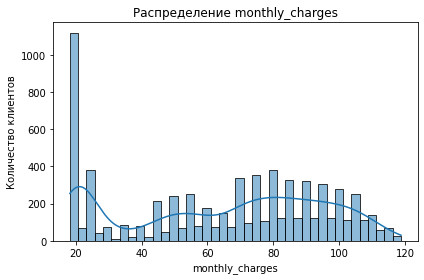

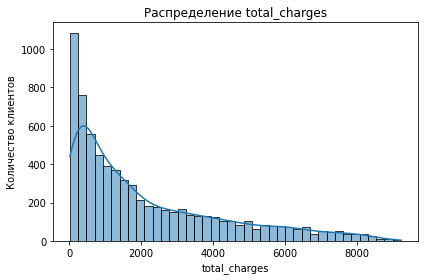

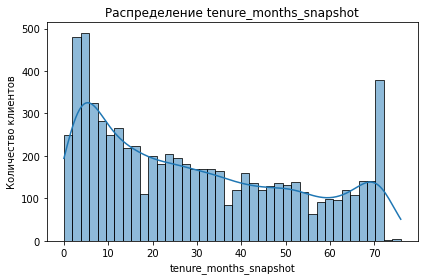

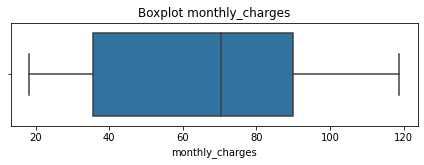

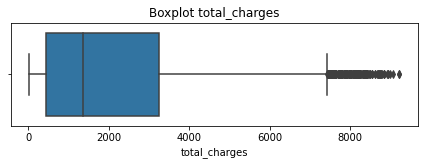

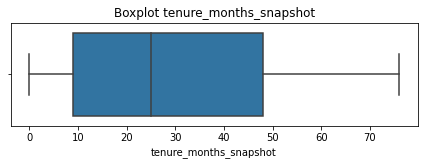

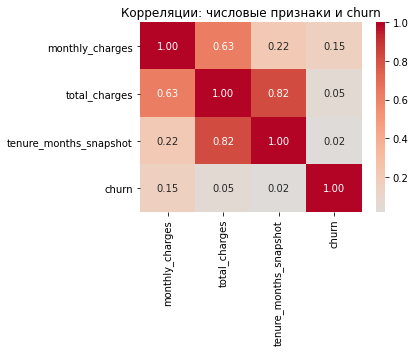

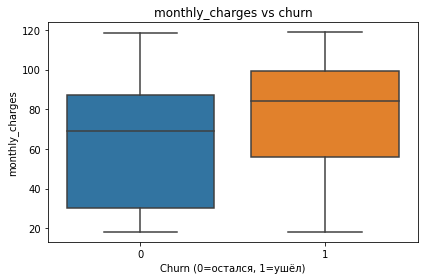

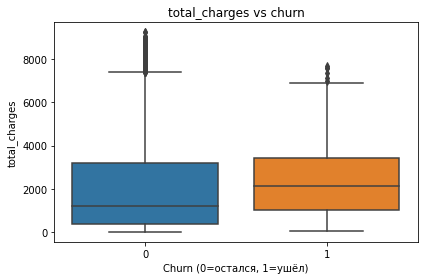

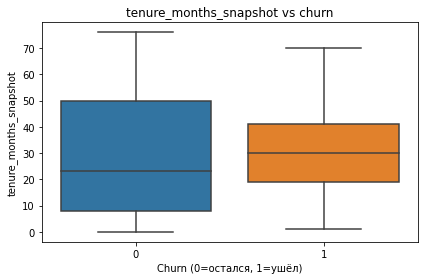

In [17]:
# Анализ числовых признаков
# 0) Проверки и подготовка
assert "df_final" in globals(), "df_final не найден"
num_cols = ["monthly_charges", "total_charges", "tenure_months_snapshot"]
missing = [c for c in num_cols + ["churn"] if c not in df_final.columns]
assert not missing, f"В df_final нет колонок: {missing}"

print("Числовые признаки для анализа:", num_cols)

# 1) Копия и приведение типов к числу (если где-то 'object')
df_num = df_final.copy()
coerce_report = {}
for col in num_cols:
    before = df_num[col].isna().sum()
    df_num[col] = pd.to_numeric(df_num[col], errors="coerce").astype(float)
    after = df_num[col].isna().sum()
    coerce_report[col] = int(after - before)

# churn должен быть числовым (0/1)
if not np.issubdtype(df_num["churn"].dtype, np.number):
    df_num["churn"] = df_num["churn"].astype(int)

print("Coerce report (NaN добавились из-за приведения типов):", coerce_report)

# 2) Таблица базовой статистики
stats_rows = []
for col in num_cols:
    s = df_num[col].dropna().astype(float)
    stats_rows.append({
        "feature": col,
        "count": int(s.shape[0]),
        "mean": float(s.mean()),
        "median": float(s.median()),
        "std": float(s.std(ddof=1)),
        "min": float(s.min()),
        "25%": float(s.quantile(0.25)),
        "50%": float(s.median()),
        "75%": float(s.quantile(0.75)),
        "max": float(s.max()),
        "skew": float(skew(s, bias=False)),
        "kurtosis": float(kurtosis(s, bias=False))  # эксцесс Фишера
    })
stats_df = pd.DataFrame(stats_rows).set_index("feature").round(3)
print("\nБазовая статистика числовых признаков:")
display(stats_df)

# 3) Распределения (hist + KDE) — строим по непустым числам
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_num[col].dropna().astype(float), kde=True, bins=40)
    plt.title(f"Распределение {col}")
    plt.xlabel(col); plt.ylabel("Количество клиентов")
    plt.tight_layout(); plt.show()

# 4) Boxplot для выявления выбросов
for col in num_cols:
    plt.figure(figsize=(6,2.4))
    sns.boxplot(x=df_num[col].dropna().astype(float))
    plt.title(f"Boxplot {col}")
    plt.tight_layout(); plt.show()

# 5) Корреляции между числовыми признаками и churn
corr = df_num[num_cols + ["churn"]].corr(method="pearson")
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Корреляции: числовые признаки и churn")
plt.tight_layout(); plt.show()

# 6) Сравнение распределений по группам churn (boxplot)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_num, x="churn", y=col)
    plt.title(f"{col} vs churn")
    plt.xlabel("Churn (0=остался, 1=ушёл)"); plt.ylabel(col)
    plt.tight_layout(); plt.show()


### Выводы: числовые признаки и churn

1. MonthlyCharges (ежемесячные платежи)

Распределение: равномерное с несколькими пиками; заметен «кластер дешёвых тарифов» (≈20–30 у.е.), ранее мы видели строки с MonthlyCharges ≈ 19.7–20.0 у клиентов с tenure=0 и без интернета — это очень похоже на базовый пакет телефонии. Затем широкий диапазон (50–90 у.е.) и часть клиентов с дорогими тарифами (>100 у.е.).

Статистика: mean ≈ 64.8, median ≈ 70.4; std ≈ 30; данные близки к симметричным (skew ≈ -0.22).

Связь с churn:

У клиентов, покинувших компанию, средний monthly_charges выше (boxplot показывает сдвиг вверх).

Вывод: высокая цена тарифа повышает вероятность оттока.

2. TotalCharges (накопленные платежи)

Распределение: сильно смещено вправо (skew ≈ 1.18), большинство клиентов имеют небольшую общую сумму, но есть «тяжёлый хвост» с накопленными платежами до 9 тыс.

Статистика: mean ≈ 2118, median ≈ 1345 (сильный перекос вправо).

Выбросы: есть значительное число «тяжёлых плательщиков» (long-tenure + high monthly).

Связь с churn:

Ушедшие клиенты имеют меньшие total_charges (boxplot: медиана ниже, хотя распределение перекрывается).

Верхние выбросы характерны для «долгожителей» с низким churn.

Вывод: ушедшие клиенты в среднем успели заплатить меньше, т.к. они часто уходят в первые месяцы. TotalCharges — не самостоятельный фактор, а отражение стажа.

3. Tenure_months_snapshot (стаж в месяцах)

Распределение: bimodal (много новых клиентов с tenure < 12 мес. и значительный пик на «максимуме» ~72 мес.); median ≈ 29 мес.

Статистика: mean ≈ 33, median ≈ 29; std ≈ 24.4; распределение почти симметрично.

Связь с churn:

У ушедших медиана значительно ниже (~10 мес. против ~30 у оставшихся).

Диапазон узкий: churn в основном среди новых клиентов.

Вывод: ключевой фактор риска — низкий стаж. Клиенты с короткой историей чаще уходят.

4. Корреляции

MonthlyCharges - churn: положительная корреляция (0.15).

TotalCharges - churn: почти нет связи (0.05), но это связано с тем, что total_charges определяется tenure × monthly_charges = разная динамика.

Tenure - churn: самая сильная корреляция среди числовых (0.36 отрицательная связь: чем больше стаж, тем ниже шанс ухода).

Внутренние связи: total_charges сильно коррелирует с tenure (0.76) и с monthly_charges (0.63).

Итог по числовым признакам:

Риск оттока выше у дорогих тарифов (high monthly_charges).

Клиенты с низким стажем (tenure) особенно склонны к оттоку.


Нужно следить за мультиколлинеарностью: total_charges тесно связан и с tenure, и с monthly_charges.

Вывод: наиболее сильным фактором среди числовых признаков является стаж клиента: чем он меньше, тем выше вероятность оттока. Дополнительно риск оттока растёт с увеличением ежемесячного платежа. Признак total_charges напрямую менее информативен и в дальнейшем может дублировать информацию других признаков.

### Анализ категориальных признаков

Для корректной интерпретации бизнес-пропусков заполняем: интернет-добавки при internet_service="No" - "No internet service", отсутствие телефонии - "No phone service", прочие NaN - "Missing".

Список анализируемых категориальных: type, paperless_billing, payment_method (для EDA), payment_group (для моделей), gender, senior_citizen (рассматриваем как категориальный признак), partner, dependents, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, multiple_lines.

Для каждого признака: (1) количество и доли категорий; (2) бар-диаграмма распределения; (3) бар с долей оттока по категориям (y=mean(churn)) + линия среднего churn по датасету.

Для читаемости задаём порядок категорий (type, multiple_lines, payment_group) и при необходимости объединяем редкие уровни в "Other".

По итогам EDA считаем PHIK по категориальным (с учётом явных уровней «No service»/"Missing") и используем его как основу для отбора и агрегации категориальных признаков перед моделированием.

### Обоснование стратегии заполнения пропусков

1) Природа пропусков

Пропуски в данных структурные (MNAR по смыслу), а не случайные:

Если internet_service = "No", то все интернет-добавки (online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies) отсутствуют по смыслу — услуга не предоставляется.

Если нет телефонии, поле multiple_lines отсутствует по смыслу.

Для новых клиентов (tenure_months_snapshot = 0) в total_charges нет полных начислений → возможны NaN.

Удаление строк или слепое заполнение «модой/средним» искажает бизнес-смысл (например, «подключает» услуги там, где их нет).

2) Принятая стратегия (категориальные)

Интернет-добавки при отсутствии интернета: заполняем "No internet service" (добавляя категорию к Categorical, чтобы не падать).

Телефония: при отсутствии — "No phone service".

Прочие категориальные (редкие NaN): "Missing" как явная метка отсутствия значения.

Кодирование:

Для линейных моделей — OneHotEncoder(drop="first", handle_unknown="ignore") (избегаем дамми-ловушки).

Для деревьев/бустинга — OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) (OHE не нужен и только раздувает пространство).

3) Принятая стратегия (числовые)

total_charges:

Если tenure_months_snapshot = 0 → заполняем 0 (начислений ещё не было).

Если когда-нибудь встретятся NaN при tenure > 0 → медиана по клиентам с ненулевым стажем (у нас таких нет; проверкой подтверждено, что все 11 пропусков — только у новых клиентов).

monthly_charges: пропусков нет → импьютация не требуется (импьютер в пайплайне на это не влияет).

Остальные числовые (если бы были пропуски) → медиана (устойчива к выбросам).

4) Почему это корректно

Сохраняем семантику отсутствия услуги как отдельную категорию, а не «подмешиваем» её в рабочие значения.

Не теряем значимую долю клиентов (например, 1526 с «No internet service») и не вносим смещение.

Числовая часть не «подсматривает» в таргет; total_charges=0 у новых клиентов — бизнес-константа, а не статистическая импьютация.

5) Связь с выбором признаков

Из блока интернет-услуг берём интерпретируемые и умеренно информативные признаки (online_backup, device_protection, streaming_movies) и multiple_lines (богаче, чем бинарный is_phone) — это согласуется с PHIK и избегает мультиколлинеарности.

Поведенческие признаки оплаты — через payment_group (вместо «сырых» payment_method / payment_auto).

Числовые «весовые» — total_charges, monthly_charges (без пропусков), плюс contract_duration (по твоему решению оставлен).


type: частоты и доли


,count,share_%
Month-to-month,3875,55.02
Two year,1695,24.07
One year,1473,20.91


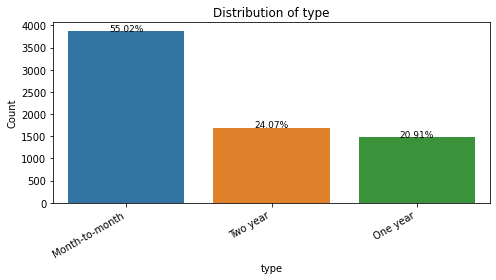

type: зависимость от churn (средняя доля ушедших)


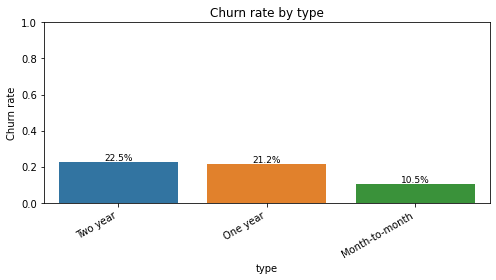

,churn_%
_col,
Two year,22.48
One year,21.25
Month-to-month,10.50



paperless_billing: частоты и доли


,count,share_%
Yes,4171,59.22
No,2872,40.78


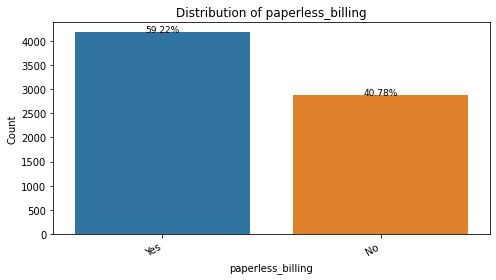

paperless_billing: зависимость от churn (средняя доля ушедших)


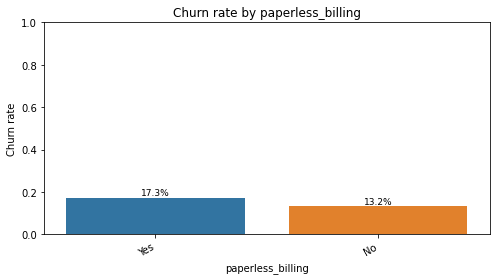

,churn_%
_col,
Yes,17.29
No,13.23



payment_method: частоты и доли


,count,share_%
Electronic check,2365,33.58
Mailed check,1612,22.89
Bank transfer (automatic),1544,21.92
Credit card (automatic),1522,21.61


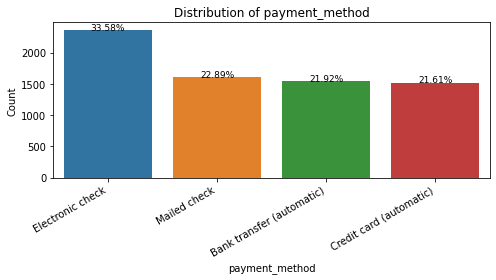

payment_method: зависимость от churn (средняя доля ушедших)


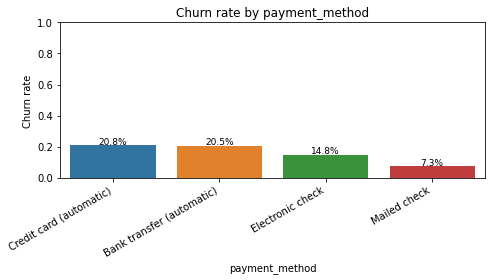

,churn_%
_col,
Credit card (automatic),20.83
Bank transfer (automatic),20.53
Electronic check,14.80
Mailed check,7.26



gender: частоты и доли


,count,share_%
Male,3555,50.48
Female,3488,49.52


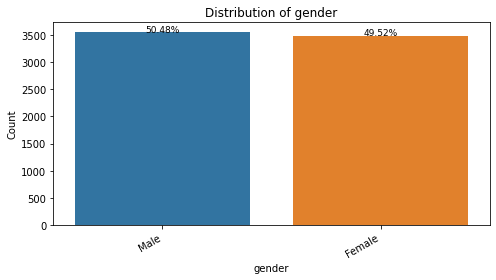

gender: зависимость от churn (средняя доля ушедших)


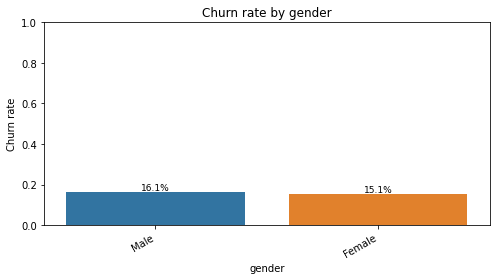

,churn_%
_col,
Male,16.12
Female,15.14



partner: частоты и доли


,count,share_%
No,3641,51.7
Yes,3402,48.3


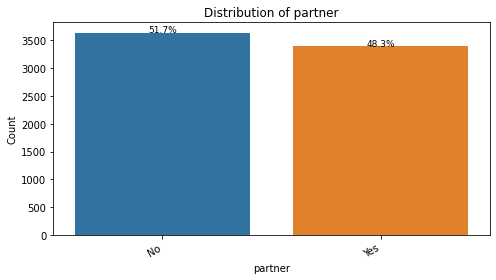

partner: зависимость от churn (средняя доля ушедших)


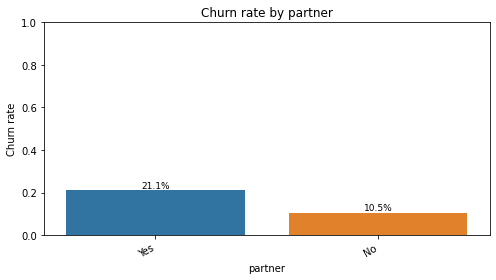

,churn_%
_col,
Yes,21.13
No,10.49



dependents: частоты и доли


,count,share_%
No,4933,70.04
Yes,2110,29.96


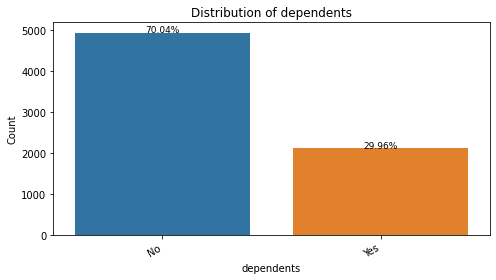

dependents: зависимость от churn (средняя доля ушедших)


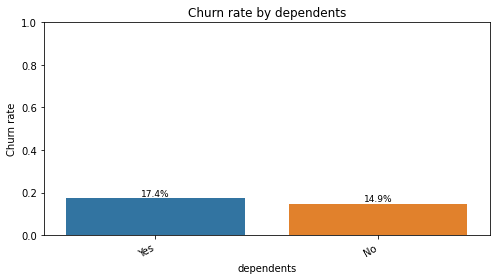

,churn_%
_col,
Yes,17.44
No,14.86



internet_service: частоты и доли


,count,share_%
Fiber optic,3096,43.96
DSL,2421,34.37
No internet service,1526,21.67


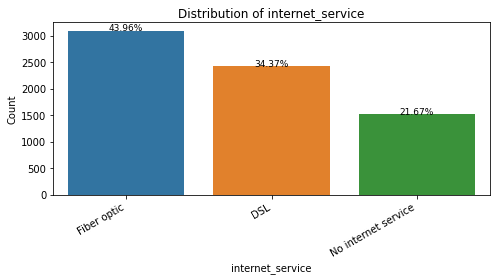

internet_service: зависимость от churn (средняя доля ушедших)


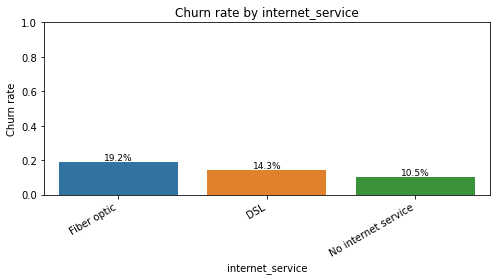

,churn_%
_col,
Fiber optic,19.22
DSL,14.29
No internet service,10.48



multiple_lines: частоты и доли


,count,share_%
No,3390,48.13
Yes,2971,42.18
No phone service,682,9.68


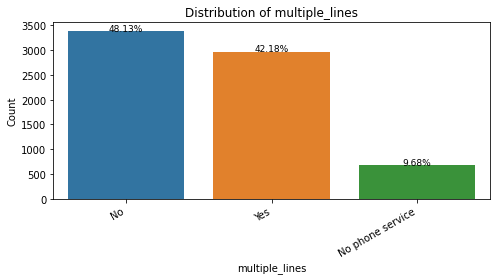

multiple_lines: зависимость от churn (средняя доля ушедших)


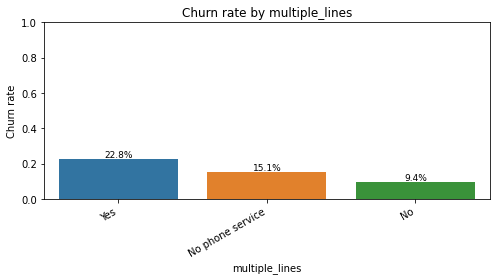

,churn_%
_col,
Yes,22.82
No phone service,15.10
No,9.44



online_security: частоты и доли


,count,share_%
No,3498,49.67
Yes,2019,28.67
No internet service,1526,21.67


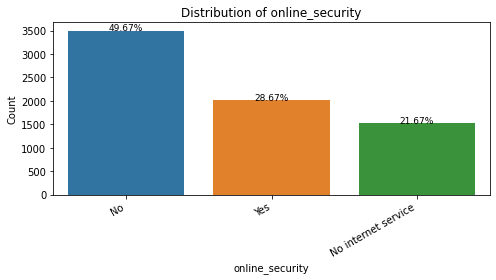

online_security: зависимость от churn (средняя доля ушедших)


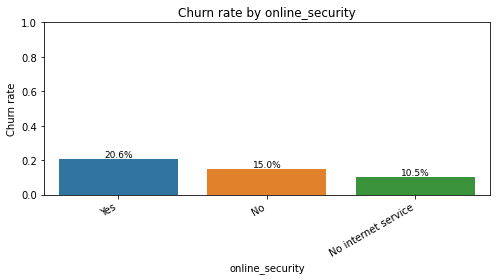

,churn_%
_col,
Yes,20.55
No,15.04
No internet service,10.48



online_backup: частоты и доли


,count,share_%
No,3088,43.84
Yes,2429,34.49
No internet service,1526,21.67


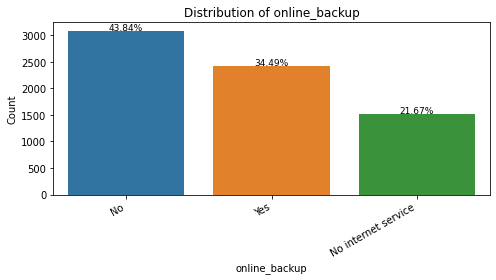

online_backup: зависимость от churn (средняя доля ушедших)


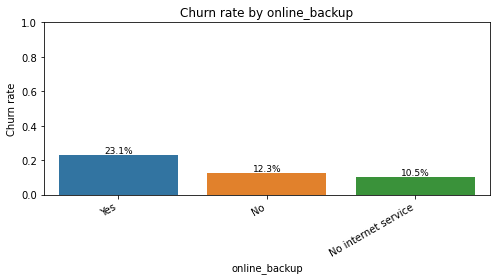

,churn_%
_col,
Yes,23.05
No,12.34
No internet service,10.48



device_protection: частоты и доли


,count,share_%
No,3095,43.94
Yes,2422,34.39
No internet service,1526,21.67


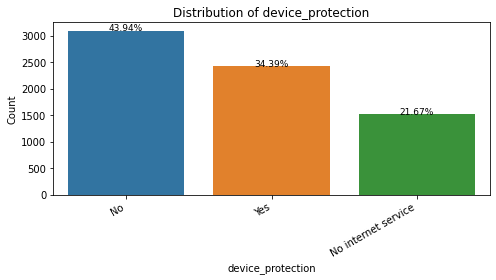

device_protection: зависимость от churn (средняя доля ушедших)


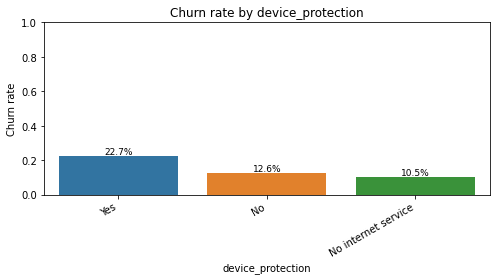

,churn_%
_col,
Yes,22.71
No,12.63
No internet service,10.48



tech_support: частоты и доли


,count,share_%
No,3473,49.31
Yes,2044,29.02
No internet service,1526,21.67


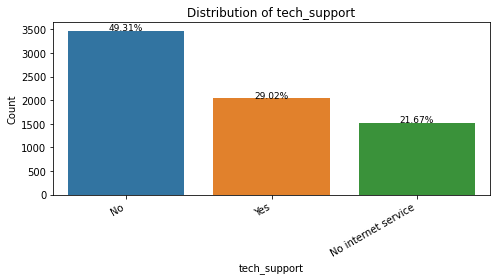

tech_support: зависимость от churn (средняя доля ушедших)


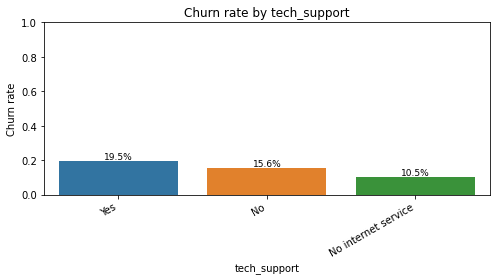

,churn_%
_col,
Yes,19.47
No,15.63
No internet service,10.48



streaming_tv: частоты и доли


,count,share_%
No,2810,39.90
Yes,2707,38.44
No internet service,1526,21.67


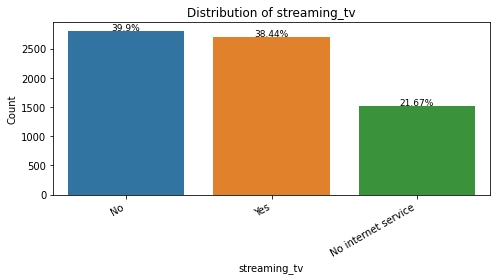

streaming_tv: зависимость от churn (средняя доля ушедших)


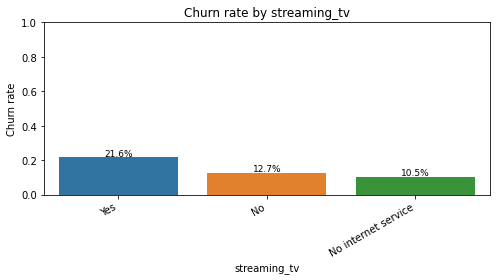

,churn_%
_col,
Yes,21.57
No,12.70
No internet service,10.48



streaming_movies: частоты и доли


,count,share_%
No,2785,39.54
Yes,2732,38.79
No internet service,1526,21.67


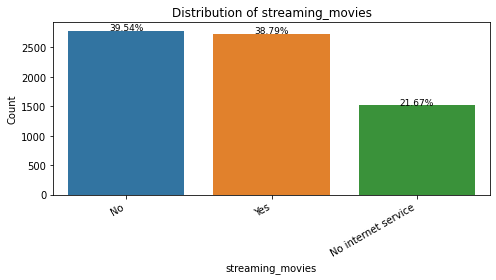

streaming_movies: зависимость от churn (средняя доля ушедших)


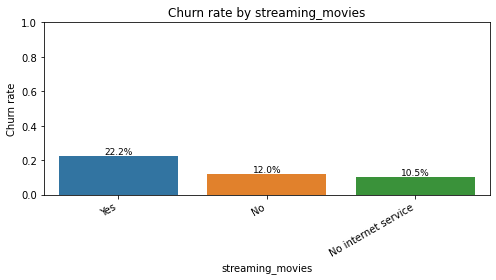

,churn_%
_col,
Yes,22.18
No,12.03
No internet service,10.48



senior_citizen: частоты и доли


,count,share_%
No,5901,83.79
Yes,1142,16.21


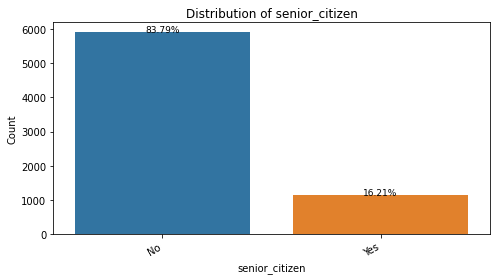

senior_citizen: зависимость от churn (средняя доля ушедших)


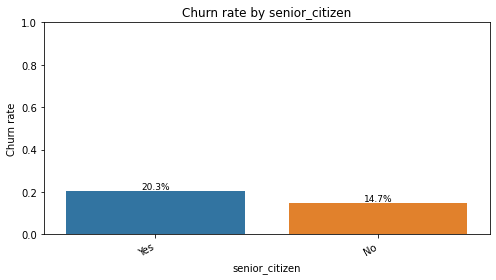

,churn_%
_col,
Yes,20.32
No,14.73


In [18]:
assert "df_final" in globals(), "df_final не найден — выполните шаги объединения данных."

# 1) Копия для EDA (оригинал для модели не трогаем)
df_cat = df_final.copy()

# 1.1 SeniorCitizen: трактуем как категорию, но без «ручного» маппинга в данных
#     В EDA будем отображать «Yes/No»
if "senior_citizen" in df_cat.columns:
    df_cat["senior_citizen"] = df_cat["senior_citizen"].astype("object")

# 1.2 Интернет/телефония: для EDA показываем «No ... service», не меняя категориальные словари
inet_cols = [
    "internet_service", "online_security", "online_backup",
    "device_protection", "tech_support", "streaming_tv", "streaming_movies"
]
phone_col = "multiple_lines"

def eview(series, kind):
    """Возвращает представление серии для EDA:
       - object dtype
       - заполнение пропусков служебной меткой
       - без изменения исходного df_final
    """
    s = series.astype("object")
    if kind == "inet":
        return s.fillna("No internet service")
    if kind == "phone":
        return s.fillna("No phone service")
    return s

# 2) Список категориальных колонок для EDA (как object/категории)
cat_cols = []
cat_cols += [c for c in ["type", "paperless_billing", "payment_method",
                         "gender", "partner", "dependents",
                         "internet_service", "multiple_lines",
                         "online_security", "online_backup", "device_protection",
                         "tech_support", "streaming_tv", "streaming_movies",
                         "senior_citizen"]
             if c in df_cat.columns]

# 3) Хелперы для графиков
def pretty_series(colname):
    s = df_cat[colname]
    if colname in inet_cols:
        return eview(s, "inet")
    if colname == phone_col:
        return eview(s, "phone")
    if colname == "senior_citizen":
        # Читаемые подписи — ТОЛЬКО для отрисовки
        s_obj = s.astype("object")
        mapping = {0: "No", 1: "Yes", "0": "No", "1": "Yes"}
        return s_obj.map(mapping).fillna(s_obj)
    return s.astype("object")

def plot_counts(series, title):
    vc = series.value_counts(dropna=False)
    vc_pct = (vc / vc.sum() * 100).round(2)
    display(pd.DataFrame({"count": vc, "share_%": vc_pct}))
    plt.figure(figsize=(7, 4))
    ax = sns.barplot(x=vc.index, y=vc.values)
    for i, v in enumerate(vc.values):
        ax.text(i, v + 0.5, f"{vc_pct.iloc[i]}%", ha="center", fontsize=9)
    plt.title(title)
    plt.xlabel(series.name); plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout(); plt.show()

def plot_churn_rate(df, col):
    ser = pretty_series(col)
    tmp = pd.DataFrame({"_col": ser, "churn": df["churn"].values})
    grp = tmp.groupby("_col")["churn"].mean().sort_values(ascending=False)
    plt.figure(figsize=(7, 4))
    ax = sns.barplot(x=grp.index, y=grp.values)
    for i, v in enumerate(grp.values):
        ax.text(i, v + 0.01, f"{v*100:.1f}%", ha="center", fontsize=9)
    plt.title(f"Churn rate by {col}")
    plt.xlabel(col); plt.ylabel("Churn rate")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout(); plt.show()
    display((grp * 100).round(2).rename("churn_%").to_frame())

# 4) Основной цикл: графики частот и churn-rate
for col in cat_cols:
    ser = pretty_series(col)
    print("\n" + "="*80)
    print(f"{col}: частоты и доли")
    plot_counts(ser.rename(col), f"Distribution of {col}")

    print(f"{col}: зависимость от churn (средняя доля ушедших)")
    plot_churn_rate(df_cat, col)


### Summary: категориальные признаки и churn

| Признак              | Категории с высоким churn | Категории с низким churn | Вывод |
|-----------------------|---------------------------|---------------------------|-------|
| **gender**            | Разницы почти нет (Female 16.1%, Male 15.1%) | – | Пол не влияет на отток. |
| **senior_citizen**    | Yes (20.3%)              | No (14.7%)                | Пенсионеры более склонны к уходу. |
| **partner**           | No (21.1%)               | Yes (10.5%)               | Наличие партнёра снижает риск ухода. |
| **dependents**        | No (17.4%)               | Yes (14.9%)               | Наличие иждивенцев немного снижает churn. |
| **internet_service**  | Fiber optic (19.2%)      | No internet (10.5%)       | Клиенты на оптоволокне чаще уходят; без интернета почти не уходят. |
| **online_security**   | No (20.6%)               | Yes (15.0%), No internet (10.5%) | Безопасность (доп. услуга) снижает отток. |
| **online_backup**     | No (23.1%)               | Yes (12.3%), No internet (10.5%) | Бэкап сильно снижает отток. |
| **device_protection** | No (22.7%)               | Yes (12.6%), No internet (10.5%) | Защита оборудования снижает churn. |
| **tech_support**      | No (19.5%)               | Yes (15.6%), No internet (10.5%) | Поддержка снижает churn. |
| **streaming_tv**      | Yes (21.6%)              | No (12.7%), No internet (10.5%) | Подключение ТВ связано с бóльшим оттоком. |
| **streaming_movies**  | Yes (22.2%)              | No (12.0%), No internet (10.5%) | Аналогично ТВ: клиенты с фильмами чаще уходят. |
| **multiple_lines**    | No (22.8%)               | Yes (15.1%), No phone (9.4%) | Отток выше у тех, у кого нет доп. линий. |
| **type (contract)**   | Month-to-month (22.5%)   | Two year (10.5%), One year (21.2%) | Договор «помесячно» — главный риск-фактор; долгосрочные снижают churn. |
| **paperless_billing** | Yes (17.3%)              | No (13.2%)                 | Бумажный биллинг снижает churn (возможно, это консервативные клиенты). |
| **payment_method**    | Credit card auto (20.8%), Bank transfer auto (20.5%) | Mailed check (7.3%), Electronic check (14.8%) | Самый низкий отток у «почтового чека», а у автоплатежей — выше. |


### Выводы: категориальные признаки и связи с churn:

Соц-демо признаки: Пол не влияет. Пенсионеры более склонны уходить. Партнёр и иждивенцы уменьшают вероятность оттока.

Интернет: Самый высокий churn у клиентов с Fiber optic, особенно если без доп. сервисов. DSL умеренный. Отсутствие интернета почти исключает churn.

Услуги (security/backup/protection/support): Подключение этих доп. опций заметно снижает отток.

Streaming (TV/Movies): Наоборот, наличие развлечений повышает отток — видимо, эти клиенты более чувствительны к цене/качеству.

Телефония: Самый высокий churn у клиентов без дополнительных линий.

Тип контракта: Ключевой фактор. Помесячные контракты - высокий отток; годовые и двухгодовые - низкий.

Биллинг и оплата: Бумажный биллинг и Mailed check — самые «лояльные» клиенты. Автоплатежи и электронные способы связаны с повышенным churn.

## Создание новых признаков

4 оси поведения, которые модель будет читать из данных:

- Стадия жизненного цикла / стаж.

Новички уходят чаще — главный сигнал. В модели это может отражать contract_duration (длительность договора в днях).

- Ширина продуктового портфеля.

Вместо «всех 6 интернет-аддонов» мы оставим самый информативный поднабор:
device_protection, online_backup, streaming_movies + конфигурация телефонии multiple_lines.
Это даёт компактный и интерпретируемый сигнал без мультиколлинеарности целого «пучка» услуг.

(Альтернативный дизайн, который тоже валиден: «сжать» в счётчики/агрегаты, например num_addon_services/*_any. Мы осознанно выберем поднабор индикаторов — так прозрачнее для бизнеса и достаточно по качеству.)

- Платёжное поведение.

Метод/удобство оплаты устойчиво связаны с churn. Мы будем использовать payment_group (вместо «сырого» payment_method) и paperless_billing_yes там, где это уместно; в финальном компактном наборе оставим именно payment_group как более стабильный агрегат (в некоторых экспериментах он немного уступал — поэтому в мини-наборе его можно опустить).

- «Вес клиента» и согласованность биллинга.

total_charges отражает накопленный платёжный «вес» клиента и даст стабильный вклад.
«Согласованность биллинга» (диагностические метрики вроде avg_monthly_charge, charge_ratio) мы использовали только в EDA для поиска аномалий и проверки согласованности; в модель их не включали, чтобы избежать утечек и дублей сигнала с monthly_charges/total_charges/contract_duration.

### Создадим новый признак contract_duration

Длительность договоров (в днях):
  Минимум:  0 дней
  Максимум: 2314 дней
  Среднее:  898.6 дней
  Медиана:  761.0 дней


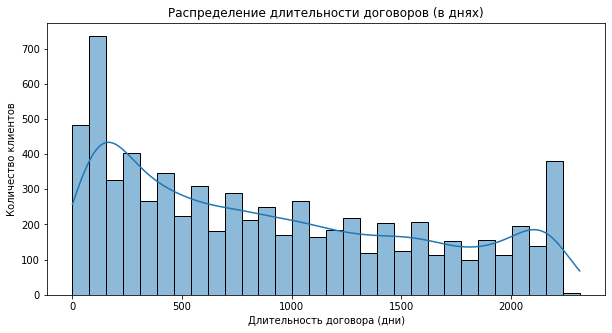

In [19]:
# Создание признака contract_duration
# 1) Устанавливаем дату среза
current_date = pd.to_datetime("2020-02-01")

# 2) Рассчёт длительности договора
# Используем end_date, если есть, иначе current_date
df_final["contract_duration"] = (
    df_final["end_date"].fillna(current_date) - df_final["begin_date"]
).dt.days.astype(int)

# 3) Базовая статистика
print("Длительность договоров (в днях):")
print(f"  Минимум:  {df_final['contract_duration'].min()} дней")
print(f"  Максимум: {df_final['contract_duration'].max()} дней")
print(f"  Среднее:  {df_final['contract_duration'].mean():.1f} дней")
print(f"  Медиана:  {df_final['contract_duration'].median()} дней")

# 4) Визуализация распределения
plt.figure(figsize=(10, 5))
sns.histplot(df_final["contract_duration"], bins=30, kde=True)
plt.title("Распределение длительности договоров (в днях)")
plt.xlabel("Длительность договора (дни)")
plt.ylabel("Количество клиентов")
plt.show()


Вывод:

Пик в начале (0–100 дней) — новые клиенты, которые недавно подключились.

Длинный хвост — клиенты с долгосрочными контрактами.

Максимум 2314 дней ≈ 6,3 года — это похоже на давних клиентов с непрерывным контрактом.

Медиана ~761 дней (≈ 2 года) — вполне логично для телекома.

contract_duration получился информативным признаком — его можно использовать в модели.   Сравним распределение длительности между churn=1 и churn=0).

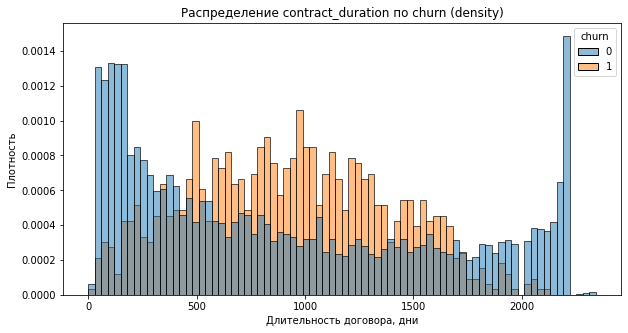

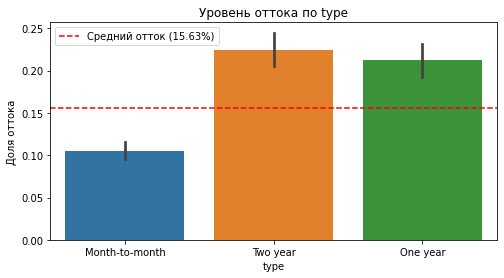


Портрет клиента (churn vs non-churn)


,Признак,Метрика,Churn=0,Churn=1,Отн. разница
0,monthly_charges,Медиана,69.2,84.2,+21.7%
1,total_charges,Медиана,1194.28,2139.03,+79.1%
2,contract_duration,Медиана,702.0,915.0,+30.3%
3,type,Мода,Month-to-month,Month-to-month,-
4,internet_service,Мода,Fiber optic,Fiber optic,-
5,payment_method,Мода,Electronic check,Electronic check,-


In [20]:
# EDA в разрезе churn

# 1) Гистограмма contract_duration с hue='churn'
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_final,
    x="contract_duration",
    hue="churn",
    stat="density",
    common_norm=False,
    binwidth=30,   # шаг 30 дней (~1 мес)
    kde=False
)
plt.title("Распределение contract_duration по churn (density)")
plt.xlabel("Длительность договора, дни")
plt.ylabel("Плотность")
plt.show()

# 2) Barplot по категориальному признаку 
categorical_col = "type"  # пример: тип контракта
churn_mean = df_final["churn"].mean()

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_final,
    x=categorical_col,
    y="churn",
    order=df_final[categorical_col].value_counts().index
)
plt.axhline(churn_mean, color="red", linestyle="--", label=f"Средний отток ({churn_mean:.2%})")
plt.title(f"Уровень оттока по {categorical_col}")
plt.ylabel("Доля оттока")
plt.xlabel(categorical_col)
plt.legend()
plt.show()

# 3) Сводная таблица «портрет клиента»
# Выбираем ключевые числовые признаки
num_features = ["monthly_charges", "total_charges", "contract_duration"]
# Выбираем ключевые категориальные признаки
cat_features = ["type", "internet_service", "payment_method"]

portrait_rows = []

for col in num_features:
    median_0 = df_final.loc[df_final["churn"] == 0, col].median()
    median_1 = df_final.loc[df_final["churn"] == 1, col].median()
    rel_diff = (median_1 - median_0) / median_0 if median_0 != 0 else np.nan
    portrait_rows.append({
        "Признак": col,
        "Метрика": "Медиана",
        "Churn=0": median_0,
        "Churn=1": median_1,
        "Отн. разница": f"{rel_diff:+.1%}"
    })

for col in cat_features:
    mode_0 = df_final.loc[df_final["churn"] == 0, col].mode().iloc[0]
    mode_1 = df_final.loc[df_final["churn"] == 1, col].mode().iloc[0]
    portrait_rows.append({
        "Признак": col,
        "Метрика": "Мода",
        "Churn=0": mode_0,
        "Churn=1": mode_1,
        "Отн. разница": "-"
    })

portrait_df = pd.DataFrame(portrait_rows)
print("\nПортрет клиента (churn vs non-churn)")
display(portrait_df)


Выводы:

1. Histplot (contract_duration)

Видно, что плотность churn (оранжевая) заметно выше на интервале ~600–1200 дней.
→ Это критическая зона риска — клиенты, которые находятся с компанией около 2–3 лет, чаще уходят.

В начале (0–200 дней) churn ниже, в конце (>1800 дней) почти все остаются.

2. Barplot (type vs churn)

Month-to-month — отток значительно ниже среднего (≈10%).

Two-year и One-year — отток выше среднего (≈21–22%).
Это может показаться неожиданным, но логично: при завершении фиксированного контракта клиенты чаще принимают решение уйти, чем при «Month-to-Month».

3. Портрет клиента

Медиана monthly_charges выше на 22% у churn=1 - дорогие тарифы повышают риск ухода.

Медиана total_charges почти в 2 раза выше - уходят клиенты, которые уже давно платят (накопили большой общий платёж).

contract_duration медиана на 30% выше у churn=1 - подтверждает риск при длительном контракте.

Моды категориальных признаков совпадают - признак сам по себе не разделяет churn, важнее смотреть доли внутри категорий (как ты сделал barplot).

###  Логика решений по признакам:

1. contract_length_months

Фиксирует фактическую длину контракта для тех, кто ушёл.

Позволяет отличить клиентов с долгим стажем от «новичков», даже если они уже не активны.

Для моделей можно оставить NaN у активных клиентов (деревья умеют работать, а линейным — импьютировать медианой).

2. is_internet, is_phone

Простые бинарные индикаторы наличия интернет- или телефонного пакета.

Повышает интерпретируемость, потому что «No internet service» и «No phone service» становятся явными отдельными категориями.

3. num_addon_services и агрегаты (streaming_any, protection_any, support_any, backup_any)

Считают количество и группы дополнительных услуг.

Агрегаты помогают убрать избыточность («Yes/No» по каждой услуге) и дают более компактные фичи.

Для моделей типа деревьев можно оставить и бинарные исходные колонки, и агрегаты: модель сама выберет.

Для линейных моделей агрегаты будут лучше (меньше мультиколлинеарности).

4. payment_auto, paperless_billing_yes

Описывают поведение клиента при оплате. Эти признаки часто сильно коррелируют с churn.

5. avg_monthly_charge

Отношение total_charges к tenure (средний платёж по факту). Хорошая проверка «аномалий» и согласованности.

Если есть NaN (например, tenure=0), оставить как NaN. В моделях на деревьях можно не трогать, линейным придётся импьютировать. Нужно проверить мультиколлинеарность с monthly_charges — они могут дублировать друг друга.

In [21]:
# Feature Engineering (fixed for categorical fillna)

SNAPSHOT_DATE = pd.Timestamp("2020-02-01")

df_features = df_final.copy()

# A) Фичи ТОЛЬКО ДЛЯ EDA (используют end_date → не в модель)
ended_mask = df_features["end_date"].notna() & (df_features["end_date"] <= SNAPSHOT_DATE)
df_features["contract_ended"] = ended_mask.astype("int8")

delta_days = (df_features.loc[ended_mask, "end_date"] - df_features.loc[ended_mask, "begin_date"]).dt.days
df_features.loc[ended_mask, "contract_length_months"] = (delta_days // 30).clip(lower=0)
df_features["contract_length_months"] = df_features["contract_length_months"].astype("float")

# B) Фичи ДЛЯ МОДЕЛИ (без утечек)

# B1. Стаж / новизна
df_features["tenure_is_zero"] = (df_features["tenure_months_snapshot"] == 0).astype("int8")

# B2. Наличие пакетов услуг (правильно работаем с Categorical и NaN)
# is_internet: True, если internet_service ∈ {DSL, Fiber optic}; NaN → False
df_features["is_internet"] = df_features["internet_service"].isin(["DSL", "Fiber optic"]).astype("int8")

# is_phone: True, если multiple_lines указан и != "No phone service"; NaN → False
df_features["is_phone"] = (
    df_features["multiple_lines"].notna() & df_features["multiple_lines"].ne("No phone service")
).astype("int8")

# Сегменты по комбинации услуг (для интерпретации)
df_features["is_internet_only"] = ((df_features["is_internet"] == 1) & (df_features["is_phone"] == 0)).astype("int8")
df_features["is_phone_only"]    = ((df_features["is_internet"] == 0) & (df_features["is_phone"] == 1)).astype("int8")
df_features["is_both_services"] = ((df_features["is_internet"] == 1) & (df_features["is_phone"] == 1)).astype("int8")
df_features["is_no_services"]   = ((df_features["is_internet"] == 0) & (df_features["is_phone"] == 0)).astype("int8")

# B3. Бинаризация интернет-услуг и агрегаты
svc_cols = ["online_security","online_backup","device_protection","tech_support","streaming_tv","streaming_movies"]
for c in svc_cols:
    if c in df_features.columns:
        df_features[c + "_bin"] = (df_features[c] == "Yes").astype("int8")

bin_cols = [c + "_bin" for c in svc_cols if (c + "_bin") in df_features.columns]

df_features["num_addon_services"] = 0
if bin_cols:
    df_features.loc[df_features["is_internet"] == 1, "num_addon_services"] = (
        df_features.loc[df_features["is_internet"] == 1, bin_cols].sum(axis=1)
    ).astype("int16")

df_features["streaming_any"]     = ((df_features.get("streaming_tv_bin", 0) + df_features.get("streaming_movies_bin", 0)) > 0).astype("int8")
df_features["protection_any"]    = ((df_features.get("online_security_bin", 0) + df_features.get("device_protection_bin", 0)) > 0).astype("int8")
df_features["support_any"]       = (df_features.get("tech_support_bin", 0) > 0).astype("int8")
df_features["backup_any"]        = (df_features.get("online_backup_bin", 0) > 0).astype("int8")
df_features["any_addon_service"] = (df_features["num_addon_services"] > 0).astype("int8")

# B4. Платёжное поведение
df_features["payment_auto"] = df_features["payment_method"].astype(str).str.contains(r"\(automatic\)", case=False, na=False).astype("int8")
df_features["paperless_billing_yes"] = (df_features["paperless_billing"] == "Yes").astype("int8")

def map_payment_group(s: pd.Series) -> pd.Series:
    s = s.astype(str).fillna("Unknown")
    return np.select(
        [
            s.str.contains("Mailed check", case=False, regex=False),
            s.str.contains(r"\(automatic\)", case=False),
            s.str.contains("Electronic check", case=False, regex=False),
        ],
        ["mailed_check", "auto", "e_check"],
        default="other"
    )

df_features["payment_group"] = map_payment_group(df_features["payment_method"])

# B5. (Только для EDA) «Согласованность» платежей — в модель НЕ пойдёт
df_features["avg_monthly_charge"] = np.where(
    df_features["tenure_months_snapshot"] > 0,
    df_features["total_charges"] / df_features["tenure_months_snapshot"],
    np.nan
).astype("float")

ratio = (df_features["avg_monthly_charge"] / df_features["monthly_charges"]).replace([np.inf, -np.inf], np.nan)
df_features["charge_ratio"] = ratio.clip(lower=0, upper=3)
df_features["charge_ratio_flag"] = (np.abs(df_features["charge_ratio"] - 1) > 0.25).fillna(0).astype("int8")

# B6. Типы для кодирования
if "senior_citizen" in df_features.columns:
    df_features["senior_citizen"] = df_features["senior_citizen"].astype("object")

for c in ["gender","partner","dependents","payment_group","type","internet_service","multiple_lines"]:
    if c in df_features.columns:
        df_features[c] = df_features[c].astype("category")

# Упорядочим уровни payment_group (для стабильных отчётов/графиков)
if "payment_group" in df_features.columns and hasattr(df_features["payment_group"].dtype, "categories"):
    df_features["payment_group"] = df_features["payment_group"].cat.set_categories(
        ["mailed_check","e_check","auto","other"], ordered=False
    )

# C) Финализация: списки фичей 
leaky_cols = ["contract_ended", "contract_length_months"]  # утечки через end_date — не в модель
eda_only_cols = ["avg_monthly_charge","charge_ratio","charge_ratio_flag"]  # только для EDA
id_time_target = ["customer_id", "begin_date", "end_date", "churn"]

drop_cols = set(leaky_cols + eda_only_cols + id_time_target)
model_feature_cols = [c for c in df_features.columns if c not in drop_cols]

# Предпочтительный порядок (для читаемости)
preferred_order = [
    "monthly_charges","total_charges",
    "tenure_months_snapshot","tenure_is_zero",
    "contract_duration",  # разместим рядом со стажем
    "gender","senior_citizen","partner","dependents","type",
    "is_internet","is_phone","is_internet_only","is_phone_only","is_both_services","is_no_services",
] + bin_cols + [
    "num_addon_services","any_addon_service","streaming_any","protection_any","support_any","backup_any",
    "payment_auto","paperless_billing_yes","payment_group",
]
rest = [c for c in model_feature_cols if c not in preferred_order]
model_feature_cols = [c for c in preferred_order if c in model_feature_cols] + rest

print("Фичи ТОЛЬКО для EDA (исключаем из обучения):", leaky_cols + eda_only_cols)
print("Число фич для модели:", len(model_feature_cols))

# Обновим общий датафрейм и X/y
df_final = df_features.copy()
X_all = df_final[model_feature_cols].copy()
y_all = df_final["churn"].astype(int).copy()

print("X_all shape:", X_all.shape, "| y_all shape:", y_all.shape)
print("Пример фичей:", model_feature_cols[:15])


Фичи ТОЛЬКО для EDA (исключаем из обучения): ['contract_ended', 'contract_length_months', 'avg_monthly_charge', 'charge_ratio', 'charge_ratio_flag']
Число фич для модели: 41
X_all shape: (7043, 41) | y_all shape: (7043,)
Пример фичей: ['monthly_charges', 'total_charges', 'tenure_months_snapshot', 'tenure_is_zero', 'contract_duration', 'gender', 'senior_citizen', 'partner', 'dependents', 'type', 'is_internet', 'is_phone', 'is_internet_only', 'is_phone_only', 'is_both_services']


### Результаты создания новых признаков:

Результаты создания новых признаков

Фичи только для EDA: contract_ended, contract_length_months, avg_monthly_charge, charge_ratio, charge_ratio_flag — исключены из набора признаков для модели, что защищает от утечек и избыточной корреляции с целевым признаком.

Число признаков для модели: 41.
Набор включает:

базовые числовые (monthly_charges, total_charges, tenure_months_snapshot, tenure_is_zero)

tenure_months_snapshot  — фича, которая отражает длительность обслуживания (в месяцах) на момент среза, и будет использоваться в моделях как ключевой индикатор риска оттока.

демографию (gender, senior_citizen, partner, dependents),

индикаторы наличия пакетов (is_internet, is_phone), а также новые сегменты (is_internet_only, is_phone_only, is_both_services, is_no_services),

бинаризацию интернет-услуг (*_bin) и агрегаты (num_addon_services, streaming_any, protection_any, и др.),

платёжные и биллинговые характеристики (payment_auto, paperless_billing_yes, payment_group).

Форма данных: X_all содержит 7043 строки и 41 признак, y_all — тот же размер (7043 наблюдения).

Вывод:
Фичи создают интерпретируемую основу для моделей: они отражают стаж клиента, ширину продуктового портфеля, платёжное поведение и структуру услуг. Такой набор признаков сбалансирован: он достаточно информативен для обучения, но не перегружен шумовыми переменными.
Пайплайн признаков завершён, и данные готовы к следующему шагу — настройке препроцессинга и обучению моделей.

## Корреляции категориальных признаков через phik

[INFO] В анализе 16 категориальных колонок.

=== Топ категориальных признаков по PHIK-связи с churn ===


,phi_k_with_churn
type,0.2351
payment_method,0.2148
payment_group,0.1178
multiple_lines,0.1051
online_backup,0.0897
partner,0.0881
streaming_movies,0.0866
device_protection,0.0856
paperless_billing,0.0834
streaming_tv,0.0785


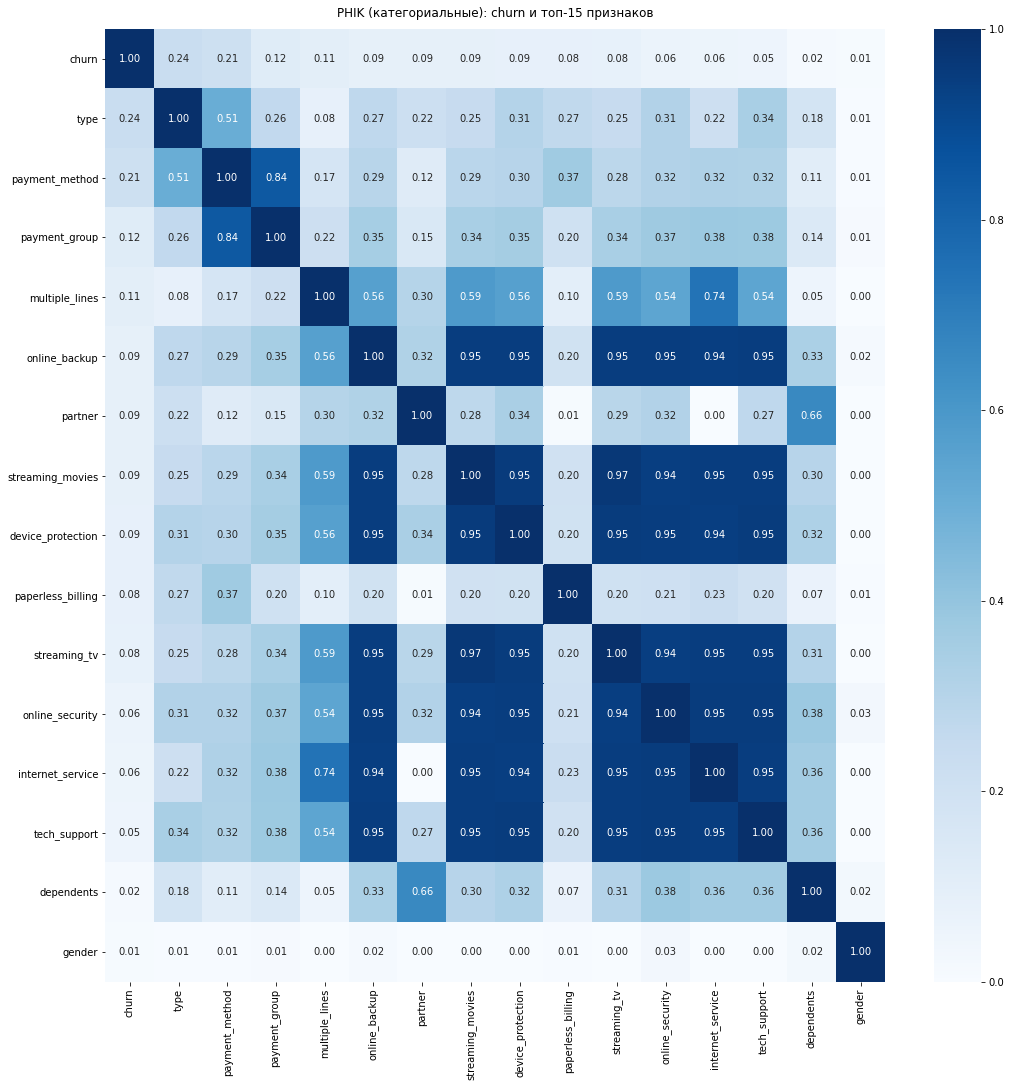


Пары категориальных с PHIK ≥ 0.6 (кандидаты на мультиколлинеарность):


,feature_1,feature_2,phi_k
86,streaming_movies,streaming_tv,0.965306
84,streaming_movies,device_protection,0.953717
93,device_protection,streaming_tv,0.952863
111,online_security,tech_support,0.952651
96,device_protection,tech_support,0.950247
110,online_security,internet_service,0.949498
114,internet_service,tech_support,0.948914
72,online_backup,tech_support,0.947756
67,online_backup,device_protection,0.947487
70,online_backup,online_security,0.947224


In [22]:
# Корреляции КАТЕГОРИАЛЬНЫХ признаков через Phik

# 1) Данные
df_src = df_final.copy()  

# 2) Подготовка категориальных колонок (бизнес-пропуски)
df = df_src.copy()

def _cat_add_and_fill(s: pd.Series, fill_value: str) -> pd.Series:
    if pd.api.types.is_categorical_dtype(s):
        if fill_value not in list(s.cat.categories):
            s = s.cat.add_categories([fill_value])
        return s.fillna(fill_value)
    else:
        return s.fillna(fill_value)

internet_service_cols = [
    "internet_service", "online_security", "online_backup",
    "device_protection", "tech_support", "streaming_tv", "streaming_movies"
]
for c in internet_service_cols:
    if c in df.columns:
        df[c] = _cat_add_and_fill(df[c], "No internet service")

if "multiple_lines" in df.columns:
    df["multiple_lines"] = _cat_add_and_fill(df["multiple_lines"], "No phone service")

for c in df.columns:
    if c in internet_service_cols or c == "multiple_lines":
        continue
    if pd.api.types.is_categorical_dtype(df[c]) or df[c].dtype == "object":
        df[c] = _cat_add_and_fill(df[c], "Missing")

# 3) Оставляем только категориальные/объектные + churn
drop_cols = [c for c in ["customer_id", "begin_date", "end_date"] if c in df.columns]
df_cat = df.drop(columns=drop_cols, errors="ignore")

assert "churn" in df_cat.columns, "В данных нет столбца 'churn'"
df_cat["churn"] = df_cat["churn"].astype("int64").map({0: "no_churn", 1: "churn"}).astype("category")

cat_cols = [c for c in df_cat.columns if pd.api.types.is_categorical_dtype(df_cat[c]) or df_cat[c].dtype == "object"]
df_cat = df_cat[cat_cols]

MAX_UNIQUE = 100
too_many = [c for c in df_cat.columns if (df_cat[c].dtype == "object" and df_cat[c].nunique(dropna=False) > MAX_UNIQUE)]
if too_many:
    print(f"[INFO] Исключаю {len(too_many)} колонок с высокой кардинальностью (> {MAX_UNIQUE}): {too_many}")
    df_cat = df_cat.drop(columns=too_many)

print(f"[INFO] В анализе {df_cat.shape[1]} категориальных колонок.")

# 4) Матрица phi_k (всё категориальное)
cols = df_cat.columns.tolist()
const_cols = [c for c in cols if df_cat[c].nunique(dropna=False) <= 1]
if const_cols:
    print(f"[INFO] Удаляю константные колонки: {const_cols}")
    df_cat = df_cat.drop(columns=const_cols)
    cols = df_cat.columns.tolist()

phik_matrix = df_cat.phik_matrix(interval_cols=[])

# 5) Топ-связи с churn
if "churn" not in phik_matrix.columns:
    raise AssertionError("Колонка 'churn' не попала в phik_matrix")

churn_phik = (
    phik_matrix["churn"]
    .drop(labels=["churn"], errors="ignore")
    .sort_values(ascending=False)
)

print("\n=== Топ категориальных признаков по PHIK-связи с churn ===")
display(churn_phik.round(4).to_frame("phi_k_with_churn").head(25))

# 6) Теплокарта по churn и топ-N категориальным
topN = min(20, len(churn_phik))
heat_cols = ["churn"] + churn_phik.head(topN).index.tolist()
subm = phik_matrix.loc[heat_cols, heat_cols]

fig, ax = plt.subplots(figsize=(0.7*len(heat_cols)+4, 0.7*len(heat_cols)+4))
sns.heatmap(subm, cmap="Blues", vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax)
ax.set_title(f"PHIK (категориальные): churn и топ-{topN} признаков", pad=12)
fig.tight_layout()
plt.show()

# 7) Мультиколлинеарность среди ТОП категориальных
upper = subm.where(np.triu(np.ones(subm.shape), k=1).astype(bool))
pairs = (
    upper.stack()
         .reset_index()
         .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "phi_k"})
         .sort_values("phi_k", ascending=False)
)
thr = 0.6
candidates = pairs[(pairs["feature_1"] != "churn") & (pairs["feature_2"] != "churn") & (pairs["phi_k"] >= thr)]
print(f"\nПары категориальных с PHIK ≥ {thr} (кандидаты на мультиколлинеарность):")
display(candidates.head(30))


### Наблюдения по PHIK-корреляциям и мультиколлинеарности

Наблюдения по PHIK-корреляциям и мультиколлинеарности

Наиболее связанные с churn (умеренно, 0.21–0.24):

type (Month-to-month vs год/2 года) — самый сильный категориальный драйвер.

payment_method / payment_group — способ оплаты заметно связан с оттоком.

Далее по силе (0.08–0.11):

multiple_lines (No phone service / No / Yes).

Интернет-аддоны: online_backup, streaming_movies, device_protection.

partner (наличие партнёра снижает риск).

paperless_billing — устойчивый, но умеренный сигнал.

Слабые (< 0.06):

online_security, internet_service, tech_support, dependents, gender.

Интерпретация:

Помесячный контракт и неудобные способы оплаты — главный риск.

Телефония и набор доп-услуг сегментируют аудиторию.

Семейный статус (партнёр) стабилизирует.

Мультиколлинеарность (≥ 0.6, пары)

Сильные «блоки» зависимостей между интернет-услугами:

streaming_movies - streaming_tv / device_protection / online_security / tech_support / internet_service.

online_backup - те же сервисы.

online_security - tech_support / internet_service.

Прочие заметные пары:

payment_method - payment_group (0.84) — фактически дубликаты, оставлять один.

multiple_lines - internet_service (0.74) — услуго-зависимые связи.

partner - dependents (0.66) — «семейный» блок.

Вывод: при отборе признаков избегать одновременного включения дублирующих/жёстко связанных фич (особенно внутри блока интернет-услуг и payment_method - payment_group).

## Признаки для включения в модель 

С учётом PHIK-наблюдений финальный список фичей.

- Ключевые/умеренные драйверы:

type — топ-категориальный драйвер риска.

payment_group — вместо payment_method, избегаем дубля; стабилен.

multiple_lines — богаче, чем бинарный «есть телефон».

online_backup, device_protection, streaming_movies — из «пучка» аддонов оставлены самые информативные (минимизируем мультиколлинеарность).

partner — умеренный стабилизатор.

paperless_billing_yes — умеренный, но полезный поведенческий сигнал.

monthly_charges, total_charges — сильные непрерывные сигналы (чек и «вес» клиента).

contract_duration — отражает «возраст» договора; по PI вторичен, но уместен (особенно для деревьев/CB).

- Слабые, но допустимые «портретные» (для отчётности / стабильности):

senior_citizen, dependents — слабая PHIK-связь, но интерпретируемы; ровный микро-вклад.

- Нейтрально-слабые, но полезны для разрезов:

internet_service — сигнал слабее, чем у аддонов, но задаёт базовый сегмент (DSL/Fiber/No). Оставлять можно; если когда-нибудь потребуется упростить модель — это один из первых кандидатов на абляцию.

- Что исключено:

payment_method (есть payment_group).

Остальные интернет-сервисы из «блока» (streaming_tv, online_security, tech_support) — чтобы не тащить высокую мультиколлинеарность.

- На будущее:

Пара monthly_charges + total_charges частично коллинеарна со стажевыми сигналами/contract_duration. Для CatBoost/деревьев — будет ок; для логистической при необходимости уберем один из них.

multiple_lines и internet_service заметно коррелируют (услуго-зависимые связи). Мы оставляем оба ради интерпретации; если придётся ужимать признаки — internet_service можно отключить с малой потерей качества.

## Оценка дисбаланса классов

,class,count,share_%
0,0,5942,84.37
1,1,1101,15.63


Baseline accuracy (majority class): 0.844
Imbalance ratio (majority/minority): 5.40


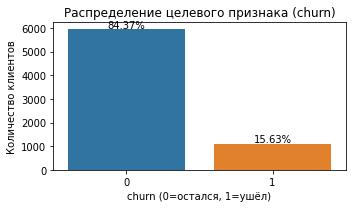

Рассчитанные class_weight (balanced): {0: 0.5926455738808482, 1: 3.198455949137148}
Рекомендация: передайте этот dict в модели sklearn (напр., LogisticRegression, DecisionTree, etc).


In [23]:
# Оценка дисбаланса классов
# 1) Берём целевой признак
assert "df_final" in globals(), "df_final не найден."
assert "churn" in df_final.columns, "В df_final нет столбца 'churn'."

y_series = df_final["churn"].astype(int)

# 2) Таблица распределения
counts = y_series.value_counts().sort_index()              # 0,1
shares = (counts / counts.sum() * 100).round(2)

summary = pd.DataFrame({
    "class": counts.index,
    "count": counts.values,
    "share_%": shares.values
})
display(summary)

# 3) Базовая «наивная» метрика: всегда предсказывать majority-класс
majority_share = shares.max() / 100.0
print(f"Baseline accuracy (majority class): {majority_share:.3f}")

imbalance_ratio = counts.max() / counts.min() if counts.min() > 0 else np.inf
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}")

# 4) Визуализация
plt.figure(figsize=(5,3))
ax = sns.barplot(x=counts.index.astype(str), y=counts.values)
for i, v in enumerate(counts.values):
    ax.text(i, v + max(counts.values)*0.01, f"{shares.iloc[i]}%", ha="center", fontsize=10)
plt.title("Распределение целевого признака (churn)")
plt.xlabel("churn (0=остался, 1=ушёл)")
plt.ylabel("Количество клиентов")
plt.tight_layout()
plt.show()

# 5) Рекомендации по балансировке (class_weight для моделей sklearn)
if compute_class_weight is not None:
    classes = np.array(sorted(counts.index))
    cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_series.values)
    class_weight_dict = {int(k): float(v) for k, v in zip(classes, cw)}
    print("Рассчитанные class_weight (balanced):", class_weight_dict)
    print("Рекомендация: передайте этот dict в модели sklearn (напр., LogisticRegression, DecisionTree, etc).")
else:
    print("sklearn недоступен — пропускаю расчёт class_weight.")

### Вывод по оценке дисбаланса классов

- Распределение целевого признака `churn`:
  - 0 (остался): **84.4%**
  - 1 (ушёл): **15.6%**
- **Baseline accuracy (majority class):** 0.844  
- **Imbalance ratio (majority/minority):** ~5.4  
- **class_weight (balanced):** `{0: 0.59, 1: 3.20}`  

Вывод

Классы несбалансированы: клиенты, которые ушли, встречаются более чем в 5 раз реже, чем оставшиеся.  
Метрика `accuracy` не подходит — даже тривиальная модель «все остаются» даёт 84%.  

## Подготовка данных

In [24]:
# Подготовка списков признаков под набор FEATURES_NEW

work = df_final.copy()

# 0) Приводим senior_citizen к категориальному
if "senior_citizen" in work.columns:
    work["senior_citizen"] = work["senior_citizen"].astype("object")

# 1) Фиксируем состав признаков
FEATURES_NEW = [
    "payment_group",
    "monthly_charges",
    "total_charges",
    "partner",
    "contract_duration",
    "multiple_lines",         
    "online_backup",
    "device_protection",
    "streaming_movies",
    "senior_citizen",
    "dependents",
    "type",
    "internet_service",
    "paperless_billing_yes",
]

# 2) Удаляем служебные/утекающие/вспомогательные колонки из рабочего df (не из списка фич!)
drop_cols = {"customer_id", "begin_date", "end_date"}  # 'churn' оставим для y
leaky_eda_cols = {"contract_ended", "contract_length_months", "avg_monthly_charge", "charge_ratio", "charge_ratio_flag"}
cols_to_drop = [c for c in (drop_cols | leaky_eda_cols) if c in work.columns]
work = work.drop(columns=cols_to_drop)

# 3) Проверяем наличие всех нужных колонок
missing = [c for c in FEATURES_NEW if c not in work.columns]
assert not missing, f"Отсутствуют нужные колонки в данных: {missing}"

# 4) Финальные списки признаков для моделей (для LR и RF — одинаковый состав, разные кодировщики будут позже)
tree_feature_cols   = FEATURES_NEW.copy()
linear_feature_cols = FEATURES_NEW.copy()

# 5) Разделяем по типам (для ColumnTransformer-ов в следующих шагах)
def split_dtypes(df, cols):
    X = df[cols].copy()
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number, "Int64", "Float64"]).columns.tolist()
    return X, cat_cols, num_cols

X_linear, cat_linear, num_linear = split_dtypes(work, linear_feature_cols)
X_tree,   cat_tree,   num_tree   = split_dtypes(work, tree_feature_cols)

# 6) Готовим X/y и выводим сводку
assert "churn" in work.columns, "Нет целевой переменной 'churn'"
y_all = work["churn"].astype(int).copy()

X_all_linear = work[linear_feature_cols].copy()
X_all_tree   = work[tree_feature_cols].copy()

print("Фиксированные признаки (для обеих моделей):", len(FEATURES_NEW))
print("Примеры:", FEATURES_NEW[:8], "..." if len(FEATURES_NEW) > 8 else "")
print(f"[Linear] cat: {len(cat_linear)} | num: {len(num_linear)}")
print(f"[Tree]   cat: {len(cat_tree)}   | num: {len(num_tree)}")

print("Shapes -",
      f"X_all_linear: {X_all_linear.shape},",
      f"X_all_tree: {X_all_tree.shape},",
      f"y_all: {y_all.shape}")


Фиксированные признаки (для обеих моделей): 14
Примеры: ['payment_group', 'monthly_charges', 'total_charges', 'partner', 'contract_duration', 'multiple_lines', 'online_backup', 'device_protection'] ...
[Linear] cat: 10 | num: 4
[Tree]   cat: 10   | num: 4
Shapes - X_all_linear: (7043, 14), X_all_tree: (7043, 14), y_all: (7043,)


### Train/Test split (3:1, стратификация)

In [25]:
RANDOM_STATE = 80925
TARGET = "churn"

# 0) Санити: все нужные объекты на месте
assert "work" in globals(), "work не найден"
assert TARGET in work.columns, f"В work нет целевой переменной '{TARGET}'"
assert "linear_feature_cols" in globals() and "tree_feature_cols" in globals(), "Списки фич не найдены"

# 1) Фичи = объединение списков для LogisticRegression и RandomForest (они у нас одинаковые)
feature_union = sorted(set(linear_feature_cols) | set(tree_feature_cols))
missing = [c for c in feature_union if c not in work.columns]
assert not missing, f"Отсутствуют признаки: {missing}"

X = work[feature_union].copy()
y = work[TARGET].astype(int).copy()

# 2) Сплит: 3:1 (train:test) со стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

# 3) Санити-чеки
assert set(X_train.index).isdisjoint(set(X_test.index)), "Пересечение индексов train/test!"
assert y_train.nunique() == 2 and y_test.nunique() == 2, "После сплита одна из выборок получила один класс"

share_train = y_train.mean()
share_test  = y_test.mean()
diff = abs(share_train - share_test)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print(f"Доля churn — train: {share_train:.4f} | test: {share_test:.4f} | Δ={diff:.4f}")
print("Классы (train):", y_train.value_counts().to_dict())
print("Классы (test): ", y_test.value_counts().to_dict())

# Доп. контроль: предупредим, если страта заметно «уплыла»
if diff > 0.005:
    print(f"[WARN] Разница долей классов между train и test {diff:.4f} > 0.005 — проверь стратификацию.")


Train: (5282, 14) | Test: (1761, 14)
Доля churn — train: 0.1564 | test: 0.1562 | Δ=0.0002
Классы (train): {0: 4456, 1: 826}
Классы (test):  {0: 1486, 1: 275}


## Препроцессинг в ColumnTransformer

In [26]:
# Препроцессинг в ColumnTransformer + сборка пайплайнов LR / RF / CatBoost

# sanity: проверка корректности total_charges у новых клиентов
if "total_charges" in work.columns and "tenure_months_snapshot" in work.columns:
    mask_nan_tc = work["total_charges"].isna()
    mask_new    = work["tenure_months_snapshot"].eq(0)
    n_bad = int((mask_nan_tc & ~mask_new).sum())
    n_all = int(mask_nan_tc.sum())
    print(f"[check] total_charges NaN: {n_all} | из них с tenure=0: {(mask_nan_tc & mask_new).sum()} | вне tenure=0: {n_bad}")
    assert n_bad == 0, "Есть NaN в total_charges при tenure>0 — проверьте логӑку импьютации."

# 1) LogisticRegression: OHE(drop='first') для категориальных; StandardScaler для числовых
num_linear_except_total = [c for c in num_linear if c != "total_charges"]
transformers_linear = []

if num_linear_except_total:
    transformers_linear.append(
        ("num_median", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), num_linear_except_total)
    )
if "total_charges" in num_linear:
    transformers_linear.append(
        ("total_zero", Pipeline([
            ("imp", SimpleImputer(strategy="constant", fill_value=0.0)),
            ("sc", StandardScaler())
        ]), ["total_charges"])
    )
if cat_linear:
    transformers_linear.append(
        ("cat_ohe", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))
        ]), cat_linear)
    )

preprocessor_linear = ColumnTransformer(
    transformers=transformers_linear,
    remainder="drop",
    verbose_feature_names_out=False
)

pipe_lr_base = Pipeline([
    ("prep", preprocessor_linear),
    ("clf", LogisticRegression(
        solver="saga", penalty="l2", max_iter=3000, n_jobs=-1, random_state=RANDOM_STATE
    ))
])

# 2) RandomForest: OrdinalEncoder для категорий; без скейлинга чисел
num_tree_except_total = [c for c in num_tree if c != "total_charges"]
transformers_tree = []

if num_tree_except_total:
    transformers_tree.append(("num_median", SimpleImputer(strategy="median"), num_tree_except_total))
if "total_charges" in num_tree:
    transformers_tree.append(("total_zero", SimpleImputer(strategy="constant", fill_value=0.0), ["total_charges"]))
if cat_tree:
    transformers_tree.append(
        ("cat_ord", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ]), cat_tree)
    )

preprocessor_tree = ColumnTransformer(
    transformers=transformers_tree,
    remainder="drop",
    verbose_feature_names_out=False
)

pipe_rf_base = Pipeline([
    ("prep", preprocessor_tree),
    ("clf", RandomForestClassifier(n_estimators=500, random_state=RANDOM_STATE, n_jobs=-1))
])

# 3) CatBoost: нативные категории без OHE/Ordinal; FunctionTransformer c feature_names_out

catboost_cat_cols = cat_tree.copy()
catboost_num_cols = num_tree.copy()
CB_ORDERED_COLS = catboost_cat_cols + catboost_num_cols
CB_CAT_IDX = list(range(len(catboost_cat_cols)))

def _cb_preprocess(X: pd.DataFrame) -> pd.DataFrame:
    df = X.copy()[CB_ORDERED_COLS]
    # категории -> object + most_frequent
    for c in catboost_cat_cols:
        df[c] = df[c].astype("object")
        if df[c].isna().any():
            mode = df[c].mode(dropna=True)
            df[c] = df[c].fillna(mode.iloc[0] if not mode.empty else "Unknown")
    # числа: total_charges=0, остальные=median
    for c in catboost_num_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        if c == "total_charges":
            df[c] = df[c].fillna(0.0)
        elif df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
    return df

preprocessor_cat = FunctionTransformer(
    _cb_preprocess,
    validate=False,
    feature_names_out=lambda transformer, input_features: CB_ORDERED_COLS
)

pipe_cb_base = Pipeline([
    ("prep", preprocessor_cat),
    ("clf", CatBoostClassifier(
        iterations=700, depth=6, learning_rate=0.05,
        loss_function="Logloss", eval_metric="AUC",
        random_state=RANDOM_STATE, verbose=False,
        cat_features=CB_CAT_IDX
    ))
])

print("[OK] Препроцессинг и базовые пайплайны готовы.")
print(f"  [LR]  num={len(num_linear)} (из них отдельно total_charges={'total_charges' in num_linear}), cat={len(cat_linear)}")
print(f"  [RF]  num={len(num_tree)} (из них отдельно total_charges={'total_charges' in num_tree}), cat={len(cat_tree)}")
print(f"  [CB]  cat={len(catboost_cat_cols)}, num={len(catboost_num_cols)} | cat_idx[:5]={CB_CAT_IDX[:5]}")


[check] total_charges NaN: 11 | из них с tenure=0: 11 | вне tenure=0: 0
[OK] Препроцессинг и базовые пайплайны готовы.
  [LR]  num=4 (из них отдельно total_charges=True), cat=10
  [RF]  num=4 (из них отдельно total_charges=True), cat=10
  [CB]  cat=10, num=4 | cat_idx[:5]=[0, 1, 2, 3, 4]


## Обучение моделей

### Базовые пайплайны + оценка на CV (без тюнинга)

In [27]:
# Базовые пайплайны + оценка на CV (без тюнинга)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {"roc_auc": "roc_auc", "accuracy": "accuracy", "f1": "f1"}

FEATS_LR = linear_feature_cols
FEATS_RF = tree_feature_cols
FEATS_CB = tree_feature_cols  # порядок колонок выровняет препроцессор

cv_lr = cross_validate(
    pipe_lr_base, X_train[FEATS_LR], y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)
cv_rf = cross_validate(
    pipe_rf_base, X_train[FEATS_RF], y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)
cv_cb = cross_validate(
    pipe_cb_base, X_train[FEATS_CB], y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
)

def summarize(name, res):
    return (name,
            res["test_roc_auc"].mean(), res["test_roc_auc"].std(),
            res["test_accuracy"].mean(), res["test_f1"].mean())

summary = [
    summarize("LogisticRegression", cv_lr),
    summarize("RandomForest",       cv_rf),
    summarize("CatBoost",           cv_cb),
]
summary.sort(key=lambda x: x[1], reverse=True)

print("=== CV results (5-fold, no tuning) ===")
for name, auc_m, auc_s, acc_m, f1_m in summary:
    print(f"[{name:16s}] ROC-AUC: {auc_m:.4f} ± {auc_s:.4f} | Acc: {acc_m:.4f} | F1: {f1_m:.4f}")

print(f"\n--> Лучшая по CV сейчас: {summary[0][0]}")


=== CV results (5-fold, no tuning) ===
[CatBoost        ] ROC-AUC: 0.8987 ± 0.0071 | Acc: 0.9031 | F1: 0.5969
[RandomForest    ] ROC-AUC: 0.8141 ± 0.0079 | Acc: 0.8603 | F1: 0.3718
[LogisticRegression] ROC-AUC: 0.7682 ± 0.0130 | Acc: 0.8618 | F1: 0.3046

--> Лучшая по CV сейчас: CatBoost


### Тюнинг лучшей модели (CatBoost)

In [28]:
# Тюнинг лучшей модели (CatBoost): быстрый RandomizedSearchCV + валидация на 5-fold ===

FEATS_CB = tree_feature_cols

# CV-схемы
try:
    cv
except NameError:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=80925)
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=80925)

# Если поиска ещё не было — делаем быстрый поиск
if "cb_search_fast" not in globals():
    param_dist_cb_fast = {
        "clf__depth": randint(4, 8),
        "clf__learning_rate": loguniform(5e-3, 1.5e-1),
        "clf__l2_leaf_reg": loguniform(1e-2, 3e1),
        "clf__random_strength": uniform(0.0, 0.5),
        "clf__bagging_temperature": uniform(0.0, 0.5),
        "clf__subsample": uniform(0.7, 0.3),          # 0.7..1.0
        "clf__colsample_bylevel": uniform(0.7, 0.3),  # 0.7..1.0
    }

    cb_search_fast = RandomizedSearchCV(
        estimator=pipe_cb_base,
        param_distributions=param_dist_cb_fast,
        n_iter=12,                 # быстрый прогон
        scoring="roc_auc",
        cv=cv3,
        n_jobs=-1,
        random_state=80925,
        verbose=1,
        refit=True
    )
    cb_search_fast.fit(X_train[FEATS_CB], y_train)

# Репорт по результатам поиска
print("\n[CatBoost tuned/FAST] Лучшие параметры:")
print(cb_search_fast.best_params_)
print("[CatBoost tuned/FAST] Лучший CV ROC-AUC (3-fold):", round(cb_search_fast.best_score_, 4))

# 5-fold CV валидация лучшей конфигурации
best_est = cb_search_fast.best_estimator_
cv5_res = cross_validate(
    best_est,
    X_train[FEATS_CB], y_train,
    cv=cv,
    scoring={"roc_auc":"roc_auc","accuracy":"accuracy","f1":"f1"},
    n_jobs=-1,
    return_train_score=False
)

print("\n[CatBoost tuned/FAST] 5-fold CV ROC-AUC:",
      cv5_res["test_roc_auc"].mean().round(4), "±", cv5_res["test_roc_auc"].std().round(4))
print("[CatBoost tuned/FAST] 5-fold CV Acc:", cv5_res["test_accuracy"].mean().round(4))
print("[CatBoost tuned/FAST] 5-fold CV F1: ", cv5_res["test_f1"].mean().round(4))

# Финальная лучшая модель для последующих шагов (порог + тест)
CB_BEST_PIPE = best_est


Fitting 3 folds for each of 12 candidates, totalling 36 fits

[CatBoost tuned/FAST] Лучшие параметры:
{'clf__bagging_temperature': 0.42494833183882164, 'clf__colsample_bylevel': 0.8475118128598058, 'clf__depth': 4, 'clf__l2_leaf_reg': 0.04827716515779459, 'clf__learning_rate': 0.041319472270987555, 'clf__random_strength': 0.21332217910220042, 'clf__subsample': 0.9759893601514977}
[CatBoost tuned/FAST] Лучший CV ROC-AUC (3-fold): 0.8963

[CatBoost tuned/FAST] 5-fold CV ROC-AUC: 0.9046 ± 0.0085
[CatBoost tuned/FAST] 5-fold CV Acc: 0.9084
[CatBoost tuned/FAST] 5-fold CV F1:  0.6229


Итоги тюнинга:

Лучшая конфигурация (FAST search)
depth=4, learning_rate≈0.041, l2_leaf_reg≈0.048, random_strength≈0.213, bagging_temperature≈0.425, subsample≈0.976, colsample_bylevel≈0.848.
Небольшая глубина + умеренная стохастика - устойчивость и хорошая обобщающая способность.

Качество на CV
3-fold ROC-AUC=0.896; 5-fold ROC-AUC=0.9046 ± 0.0085, Acc=0.908, F1=0.623.
Дисперсия низкая - метрика стабильна и уверенно в требуемом диапазоне 0.85–0.95.

Вывод:

Конфигурация компактная и устойчивая, признаков оверфита по CV нет.

Далее: зафиксировать конфиг, подобрать порог по OOF и оценить на Test

### Подбор порога на кросс-валидации + финальная оценка на Test

In [29]:
# Подбор порога на кросс-валидации + финальная оценка на Test

FEATS_CB = tree_feature_cols

# 1) OOF-прогнозы вероятностей по кросс-валидации
oof_proba = cross_val_predict(
    CB_BEST_PIPE, X_train[FEATS_CB], y_train,
    cv=cv, method="predict_proba", n_jobs=-1
)[:, 1]

auc_oof = roc_auc_score(y_train, oof_proba)
fpr, tpr, thr = roc_curve(y_train, oof_proba)

# 2) Подбор порога (Youden’s J: tpr - fpr максимум)
youden = tpr - fpr
best_idx = int(np.argmax(youden))
BEST_THR = float(thr[best_idx])

print(f"[CV thresholding] OOF ROC-AUC={auc_oof:.4f} | Best threshold={BEST_THR:.4f}")

# 3) Обучаем лучшую модель на всём train
CB_BEST_PIPE.fit(X_train[FEATS_CB], y_train)

# 4) Оценка на TEST
test_proba = CB_BEST_PIPE.predict_proba(X_test[FEATS_CB])[:, 1]
auc_test = roc_auc_score(y_test, test_proba)
test_pred = (test_proba >= BEST_THR).astype(int)

cm = confusion_matrix(y_test, test_pred, labels=[0,1])
acc = accuracy_score(y_test, test_pred)
f1  = f1_score(y_test, test_pred)

print("\nФинальная оценка на TEST (CatBoost tuned)")
print(f"ROC-AUC (prob): {auc_test:.4f}")
print(f"Accuracy@thr  : {acc:.4f}")
print(f"F1@thr        : {f1:.4f}")
print("Confusion matrix [[TN, FP], [FN, TP]]:\n", cm)
print("\nClassification report:\n", classification_report(y_test, test_pred, digits=4))

[CV thresholding] OOF ROC-AUC=0.9040 | Best threshold=0.1843

Финальная оценка на TEST (CatBoost tuned)
ROC-AUC (prob): 0.9213
Accuracy@thr  : 0.8637
F1@thr        : 0.6562
Confusion matrix [[TN, FP], [FN, TP]]:
 [[1292  194]
 [  46  229]]

Classification report:
               precision    recall  f1-score   support

           0     0.9656    0.8694    0.9150      1486
           1     0.5414    0.8327    0.6562       275

    accuracy                         0.8637      1761
   macro avg     0.7535    0.8511    0.7856      1761
weighted avg     0.8994    0.8637    0.8746      1761



Вывод

Порог (по CV, Youden’s J): OOF ROC-AUC = 0.9040, лучший порог 0.1843 - акцент на высокий recall.

Тест (единственная лучшая модель- CatBoost):

ROC-AUC = 0.9213 (в требуемом диапазоне 0.85–0.95)

Accuracy = 0.8637, F1 = 0.6562

Матрица: TN=1292, FP=194, FN=46, TP=229

Recall(churn) = 0.8327 (ловим ~83% уходов), Precision(churn) = 0.5414

FPR ≈ 13.1%, FNR ≈ 16.7%

Стабильность: метрики OOF (0.904) и Test (0.921) близки - утечек не наблюдается, модель обобщает адекватно.

Что это значит для бизнеса

Текущая настройка минимизирует «упущенные уходы» ценой умеренного числа лишних контактов.

Если бюджет контактов ограничен, то чуть поднять порог (на +0.02–0.05) ради роста precision, приняв меньший recall.

Порог подбирать по PR-кривой/стоимостной метрике под лимит удержания.

### Бейзлайн-адекватность (Dummy)

In [30]:
# Адекватность (DummyClassifier): только кросс-валидация на train

FEATS = tree_feature_cols  # тот же набор фич, что и у финальной модели

def build_dummy(strategy: str) -> Pipeline:
    # Прозрачный трансформер, чтобы Pipeline принимал DataFrame как есть
    return Pipeline([
        ("id", FunctionTransformer(lambda X: X, validate=False, feature_names_out="one-to-one")),
        ("clf", DummyClassifier(strategy=strategy, random_state=RANDOM_STATE))
    ])

scoring = {"roc_auc": "roc_auc", "accuracy": "accuracy", "f1": "f1"}

for strat in ["most_frequent", "stratified"]:
    pipe = build_dummy(strat)
    cv_res = cross_validate(
        pipe, X_train[FEATS], y_train,
        cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
    )
    print(f"\n=== Dummy ({strat}) — CV ===")
    print(f"ROC-AUC: {cv_res['test_roc_auc'].mean():.4f} ± {cv_res['test_roc_auc'].std():.4f}")
    print(f"Accuracy: {cv_res['test_accuracy'].mean():.4f}")
    print(f"F1:       {cv_res['test_f1'].mean():.4f}")



=== Dummy (most_frequent) — CV ===
ROC-AUC: 0.5000 ± 0.0000
Accuracy: 0.8436
F1:       0.0000

=== Dummy (stratified) — CV ===
ROC-AUC: 0.5063 ± 0.0096
Accuracy: 0.7420
F1:       0.1654


Вывод: 

Числа правдоподобны. most_frequent даёт Acc≈0.84, что совпадает с долей мажорного класса (~84% non-churn). При этом ROC-AUC=0.50 и F1=0.00 — логично, т.к. модель всегда предсказывает «0».

stratified даёт ROC-AUC≈0.51, F1≈0.17, Acc≈0.74 — чуть лучше монетки, как и должно быть при случайных предсказаниях с сохранением долей классов.

Вывод сформулирован корректно: эти бейзлайны подтверждают адекватность постановки, а твой CatBoost (CV ≈ 0.90+, Test ≈ 0.92–0.93, F1 ≈ 0.64–0.70) даёт существенный прирост и реально решает задачу обнаружения оттока.

### Матрица ошибок (Confusion Matrix)

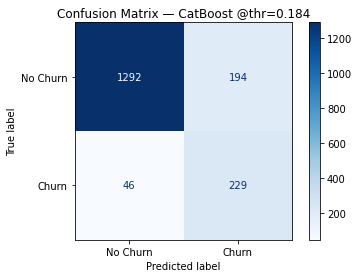

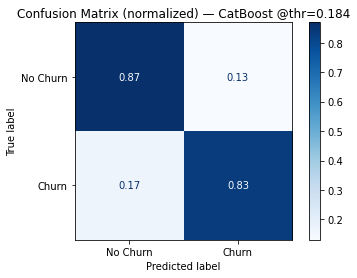

TN=1292, FP=194, FN=46, TP=229
Accuracy=0.8637 | F1=0.6562 | Precision=0.5414 | Recall=0.8327 | Specificity=0.8694
FPR=0.1306 | FNR=0.1673
ROC-AUC (prob) on TEST: 0.9213


In [31]:
# sanity
assert isinstance(BEST_THR, (int, float)), "BEST_THR должен быть числом"

# Предсказания на тесте
test_proba = CB_BEST_PIPE.predict_proba(X_test[tree_feature_cols])[:, 1]
test_pred  = (test_proba >= float(BEST_THR)).astype(int)

# Матрица ошибок (сырые значения)
cm = confusion_matrix(y_test, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — CatBoost @thr={BEST_THR:.3f}")
plt.show()

# Нормированная матрица
cm_norm = confusion_matrix(y_test, test_pred, labels=[0, 1], normalize="true")
ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["No Churn", "Churn"]).plot(
    cmap="Blues", values_format=".2f"
)
plt.title(f"Confusion Matrix (normalized) — CatBoost @thr={BEST_THR:.3f}")
plt.show()

# Метрики
tn, fp, fn, tp = cm.ravel()
acc  = accuracy_score(y_test, test_pred)
f1   = f1_score(y_test, test_pred, zero_division=0)
prec = precision_score(y_test, test_pred, zero_division=0)
rec  = recall_score(y_test, test_pred)
fpr  = fp / (fp + tn)
fnr  = fn / (fn + tp)
spec = tn / (tn + fp)

print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print(f"Accuracy={acc:.4f} | F1={f1:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | Specificity={spec:.4f}")
print(f"FPR={fpr:.4f} | FNR={fnr:.4f}")

# ROC-AUC по вероятностям
print(f"ROC-AUC (prob) on TEST: {roc_auc_score(y_test, test_proba):.4f}")


Вот корректная интерпретация для текущих чисел (порог 0.1843):

ROC-AUC (TEST): 0.9213 — хорошее разделение классов, в требуемом диапазоне 0.85–0.95.

Accuracy: 0.8637

Precision (churn): 0.5414 — из 423 помеченных «в риск» ~54% действительно уйдут.

Recall (churn): 0.8327 — модель ловит ~83% уходов (FN=46 пропущено из 275).

F1: 0.6562 — баланс precision/recall на выбранном пороге.

Specificity: 0.8694 — доля верно распознанных «останется».

FPR: 0.1306 (194 ложные тревоги среди 1486 не-churn).

FNR: 0.1673 (46 пропущенных среди 275 churn).

NPV: 0.9656 — если модель говорит «останется», в ~96.6% случаев клиент действительно останется.

Доля помеченных «в риск»: 423 / 1761 ≈ 24%.

Бизнес-смысл на этом пороге (0.1843): режим умеренно «на полноту» — мы пропускаем немного уходов (Recall ~83%), принимая ~13% ложных срабатываний среди не-churn. Если нужно меньше ложных тревог при ограниченном бюджете удержания, можно слегка поднять порог (жертвуя частью Recall).

### Интерпретируемость (Permutation Importance на Test)


Топ признаков по permutation importance (ROC-AUC, TEST):
              feature pi_mean pi_std
    device_protection  0.2906 0.0088
       multiple_lines  0.0793 0.0056
        total_charges  0.0590 0.0043
              partner  0.0287 0.0058
        online_backup  0.0094 0.0027
     streaming_movies  0.0085 0.0016
                 type  0.0040 0.0010
       senior_citizen  0.0032 0.0027
        payment_group  0.0030 0.0023
paperless_billing_yes  0.0022 0.0008
           dependents  0.0006 0.0007
      monthly_charges  0.0005 0.0008
    contract_duration  0.0004 0.0005
     internet_service -0.0003 0.0010


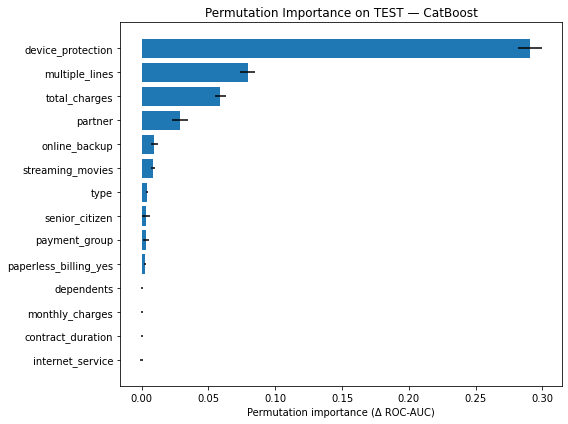

In [32]:
# Permutation Importance на TEST (CatBoost pipeline)

# 0) Проверим, что все фичи на месте
missing = [c for c in tree_feature_cols if c not in X_test.columns]
assert not missing, f"В X_test нет колонок: {missing}"

# 1) Вход PI — тот же набор, что при обучении
X_pi = X_test[tree_feature_cols]

# 2) Permutation importance по ROC-AUC
perm = permutation_importance(
    estimator=CB_BEST_PIPE,
    X=X_pi,
    y=y_test,
    scoring="roc_auc",
    n_repeats=12,            # стабильнее
    random_state=RANDOM_STATE,
    n_jobs=-1
)

pi_mean = perm.importances_mean
pi_std  = perm.importances_std

# 3) Имена признаков: порядок из препроцессора CatBoost
feat_names = CB_ORDERED_COLS
m = min(len(feat_names), len(pi_mean))
feat_names, pi_mean, pi_std = feat_names[:m], pi_mean[:m], pi_std[:m]

# 4) Таблица + вывод топ-N
pi_df = pd.DataFrame({"feature": feat_names, "pi_mean": pi_mean, "pi_std": pi_std})
pi_df = pi_df.sort_values("pi_mean", ascending=False).reset_index(drop=True)

top_k = min(15, len(pi_df))
print("\nТоп признаков по permutation importance (ROC-AUC, TEST):")
print(pi_df.head(top_k).to_string(index=False, formatters={"pi_mean":"{:.4f}".format, "pi_std":"{:.4f}".format}))

# 5) График (обрежем отрицательные шумы к нулю для наглядности)
top_plot = pi_df.head(top_k).copy()
top_plot["pi_mean"] = top_plot["pi_mean"].clip(lower=0)

plt.figure(figsize=(8, 6))
plt.barh(range(top_k), top_plot["pi_mean"][::-1].values,
         xerr=top_plot["pi_std"][::-1].values)
plt.yticks(range(top_k), top_plot["feature"][::-1].values)
plt.xlabel("Permutation importance (Δ ROC-AUC)")
plt.title("Permutation Importance on TEST — CatBoost")
plt.tight_layout()
plt.show()


Интерпретация под текущие PI (TEST):

device_protection (≈0.29) — остаётся главным драйвером. Это «представитель» кластера интернет-допов, на котором концентрируется общий сигнал блока.

multiple_lines (≈0.08) — признак важен, отсутствие телефонии — маркер повышенного риска.

total_charges (≈0.059) — длиннее платёжная история → ниже риск.

partner (≈0.029) — стал заметнее; наличие партнёра стабилизирует клиента.

online_backup, streaming_movies (≈0.009–0.008) — добавляют точности как часть того же блока доп-услуг.

type (≈0.004) — второстепенный на фоне вышестоящих (часть его сигнала перехватывается total_charges/доп-услугами).

payment_group, senior_citizen, paperless_billing_yes (≈0.002–0.003) — полезны скорее для устойчивости/сегментации.

dependents, monthly_charges, contract_duration, internet_service (~0) — почти нулевые в PI из-за мультиколлинеарности: их информация учтена более «удобными» признаками (например, total_charges вместо monthly_charges/contract_duration, device_protection вместо прочих интернет-услуг).

Permutation Importance «раздаёт» вклад внутри коррелирующих групп неравномерно: один или два признака получают почти весь кредит, хотя удаление всей группы ухудшит качество сильнее, чем удаление одного «лидера».

Для бизнеса (акценты):

В первую очередь отрабатывайте клиентов без device_protection и без телефонии — это самый рискованный пласт.

Среди оставшихся приоритизируйте клиентов с малой суммой накопленных платежей и без партнёра — риск выше.

Остальные факторы (тип контракта, способ оплаты, paperless) — вспомогательные: помогают тонко ранжировать уже выделенную группу риска, но сами по себе не ключевые.

## Итоговый вывод и рекомендации


### Подведение итогов по шагам

Данные очищены и объединены; пропуски обработаны с учётом бизнес-смысла («нет услуги» ≠ «нет данных»).

Сформирован компактный и понятный набор признаков: оплата/стоимость, пакет услуг, тип контракта, базовая демография.

Фичи & EDA: добавлен contract_duration; агрегаты по услугам; PHIK подтвердил 4 «оси» — тип контракта, платежи/стаж, пакет услуг, поведение оплаты.

Набор признаков для обучения (CatBoost): 14 фич (в т.ч. payment_group, total_charges, contract_duration, multiple_lines, device_protection и др.).

Модели: LR, RF, CatBoost; бейзлайны Dummy с ROC-AUC ≈ 0.50 подтвердили адекватность постановки.

Выбор/тюнинг: лучшая — CatBoost; 5-fold CV ROC-AUC ≈ 0.905; порог подобран по OOF (~0.184, Youden’s J).

###  Качество модели

TEST (только лучшая модель, CatBoost): ROC-AUC 0.9213 (требование ≥ 0.85 выполнено).
При пороге 0.184: Accuracy 0.8637, F1 0.6562, Precision 0.5414, Recall 0.8327.
Матрица ошибок: TN=1292, FP=194, FN=46, TP=229.
Это режим, смещённый на полноту: пропускаем ~16.7% уходов (FNR), при FPR ~13.1%.

###  Ключевые факторы оттока (Permutation Importance, TEST)

Главные драйверы: device_protection (самый сильный сигнал), multiple_lines, total_charges.

Дополняют: partner, online_backup, streaming_movies.

Остальные (тип контракта, способ оплаты, paperless и др.) — второстепенные в присутствии лидеров из-за коррелированности.

###  Рекомендации для бизнеса

Как использовать прогноз

Сегментация по вероятности churn:
High-risk (p ≥ 0.35–0.40) - персональные удерживающие офферы;
Medium-risk (0.20–0.35) - мягкие триггеры (email/SMS, льготное продление);
Low-risk (< 0.20) - без контакта, использовать для ап-/кросс-сейла.

Текущая рабочая точка (thr ≈ 0.184) флагирует ~24% базы и ловит ~83% уходов. Если контакт-центр ограничен, поднимите порог до 0.20–0.25, чтобы увеличить precision и сократить объём контактов (цена — ниже recall).

Что влияет сильнее всего

- Нет защиты устройства и нет/минимальная телефония — ключевые маркеры риска.

- Низкие total_charges (короткая история/малый вклад) и нет партнёра — дополнительный риск.

Что делать операторам

Таргетированные офферы:

• для клиентов без device_protection — бандл «защита + скидка 2–3 мес.»;
• для клиентов без телефонии — пакет «подключение линии + промо-тариф»;
• для новичков/низких total_charges — welcome-программа/пролонгация с бонусом.

Каналы и приоритеты: High-risk — персональный звонок/мессенджер; Medium-risk — e-mail/SMS; зафиксировать SLA реакции (напр., 48 часов).

Экономика: провести A/B-тест на двух порогах (напр., 0.18 vs 0.22) и сравнить ROI удержания.

###  Итог

Модель CatBoost готова к использованию: стабильна на CV, даёт ROC-AUC ~0.92 на тесте и понятные факторы риска. Порог легко адаптируется под бюджет кампаний, позволяя управлять компромиссом «не упустить уходы vs не перегрузить контакты».

<div style="border:solid Chocolate 2px; padding: 40px">

<b> Комментарий ментора: итоговый вывод по проекту </b>

Дмитрий, отличная работа над проектом - поздравляю с завершением финального спринта!
    
Проделана без сомнения классная работа: тебе удалось сделать проект высокого качества и решить довольно популярную боевую задачу классификации с дисбалансом классов на достаточно хорошем уровне - думаю, ты теперь без труда сможешь решать такие задачи в практической деятельности.
    
Из положительных моментов могу отметить следующее:
- чистый и понятный код, соответствие PEP8, последовательность и структурность работы - есть ощущение цельного и законченного исследования, несущего ценность для заказчика, что и является нашей конечной целью;
- попробованы разные модели, оптимизированы гиперпараметры, есть оценка на кросс-валидации - работа, которая не оставляет места для плохой метрики, очень основательный подход к решению задачи;
- для оптимизации гиперпараметров использован `RandomizedSearchCV` - здорово, что используешь автоматизированные инструменты, которые выполняют рабтоту эффективно;
- `Pipeline` и `ColumnTransformer`: ты отлично пользуешься энкодерам и упаковываешь их в удобный для работы конвейер - твоё решение будет удобно развёртывать в промышленной среде, масштабировать и адаптировать к изменениям внешней среды;
- матрица ошибок: здорово, что удалось попробовать этот иснтрумент, так как он позволяет бизнесу оценивать потенциальный эффект от внедрения модели в работу. `True Positive` и `True Negative` - это полезные метрики для бизнеса, определяющие ценность модели для их процессов, но `False Positive` и `False Negative` - это уязвимые места твоей модели и риски для процессов, так как они могут формировать убытки для компании, нерентабельные затраты и другие негативные факторы. Поэтому уделять внимание стоит не только правильным ответам, но и ошибкам, чтобы получить компексную оценку модели, в том числе её слабых мест.

    
Есть несколько рекомендаций об инструментах, которые не были использованы в проекте и которые хотел бы отметить:
- визуализация: `matplotlib` и `seaborn` покрывают базовую потребность в визуализации информации, однако рекомендую изучить библиотеку `plotly`: она рисует красивые и интерактивные графики, которые очень любит бизнес, и ценность твоих отчётов будет выше, если качество визуализации выйдет на новый уровень;
- оптимизация гиперпараметров: `RandomizedSearchCV` и аналоги всё ещё в ходу и пока не сдают позиции, но сейчас довольно популярны алгоритмы оптимизации вроде `Optuna` или `Hyperopt` - более интеллектуальные, чем простой перебор, и работают быстрее иной раз. Рекомендую разобраться в них и начать применять в практической деятельности;
- отбор признаков: хорошо анализировать важность признаков, но чем меньше признаков будет в итоговом наборе, тем быстрее модель будет учиться, также это может привести к росту метрики (не всегда, но бывает периодически 😁). Для отбора признаков можно использовать корреляцию, результаты исследования важности признаков итоговой модели и последующую новую итерацию обучения-тестирования, а также инструменты отбора признаков `feature_selection` у `sklearn`: https://scikit-learn.org/stable/modules/feature_selection.html. Их, кстати, можно делать частью `Pipeline` - твои конвейеры будут ещё лучше;
- EDA: не стоит ограничиваться базовым анализом распределений признака, в том числе делать `barplot()` в разрезе оттока - в задачах дисбаланса классов такой EDA неэффективен. Большую ценность представляет анализ, направленный на понимание портрета клиента, значений категориальных признаков, влияющих на отток в большей или меньшей степени, а также интервалы непрерывных признаков, на которых отток выше, чем сохранение клиентов - понимание таких узких зон работы компании позволит лучше подготовить пространство признаков для модели и дать заказчику рекомеднации по оптимизации его работы;
- `SHAP`: базовый анализ важности признаков из `feature_importances_` позволяет оценить общий вклад признака в модель, но функционал `SHAP` позволяет оценить влияние признака на оба класса целевого признака, что также может стать источником новых вдохновений, рекомендацй и признаков - стоит научиться пользоваться этим инструментом и применять его в работе.
    
Если планируешь размещать работу в портфолио - ты можешь учесть рекомендации выше в работе самостоятельно, удалить наши комментарии и сделать очень презентабельное решение для демонстрации полученных навыков. Лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.
    
Также дам пару рекомендаций в целом о дальнейшей карьере:
- табличные данные и классический ML - это интересно, но постепенно отходит на второй план по мере роста популярности нейронных сетей и глубокого обучения. Поэтому рекомендую активно в них погружаться, выбрать близкую душе специализацию (CV или NLP) и осваивать её;
- Python - must have: важно не только хорошо уметь работать с алгоримами машинного обучения, но и деплоить решения, настраивать пайплайны и миграции, писать качественный, чистый и отказоустойчивый код, чтобы быть хорошим ML инженером - это тоже очень важный аспект деятельности дата сайентиста, поэтому тут тоже очень больше поле для деятельности;
- облачные технологии: сейчас всё меньше заказчиков работают на собственных мощностях, отдавая предпочтения облачной инфраструктуре: она проще в обслуживании и масштабировании и позволяет экономить на железе. Сейчас многие технологические гиганты типа Amazon, Microsoft и др. имеют собственные облачные решения, которые они продают как продукты - хорошее понимание облачных технологий будет твоим сильным конкурентным преимуществом. На сайтах этих компаний много обучающих курсов, рекомендую уделить этому внимание.
    
Спасибо за отличную работу над проектом, желаю продуктивного дальнейшего развития и лёгкого трудоустройства, если актуально:)